In [1]:
%load_ext autoreload

In [2]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import ff_transform
import build_dataset
import resample


ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [3]:
wt_instance = wt_instance = build_dataset.wt_data.load_instance("WTG01",load_minimal=False)


Loading WTG01...
Loaded WTG01


In [4]:
%autoreload
import ff_transform

### Plotting order spectrum
All colored lines are based upon Wind Turbine 2. <br>
First red line: first common order: 28 <br>
Second red line: second common order: 56 <br>
Third red line: third common order: 84 <br>
Horisontal yellow line: 0.2  

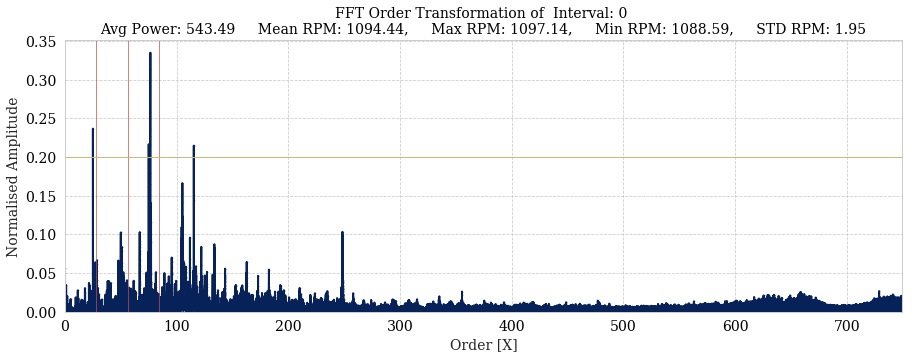

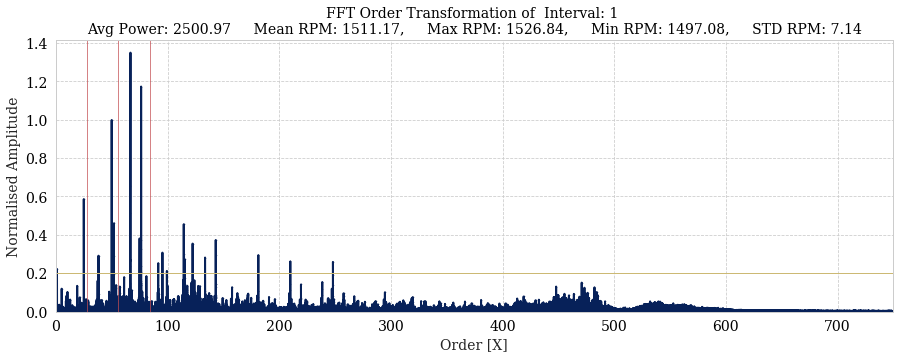

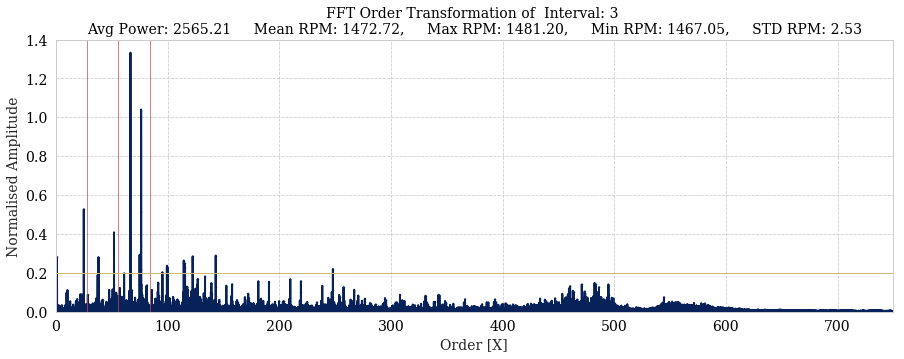

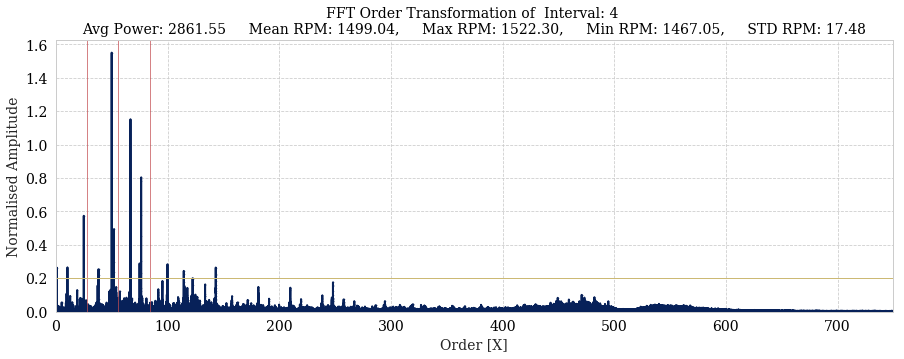

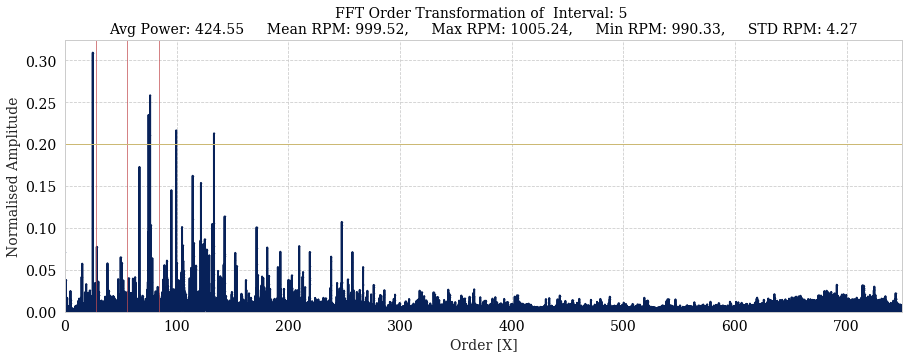

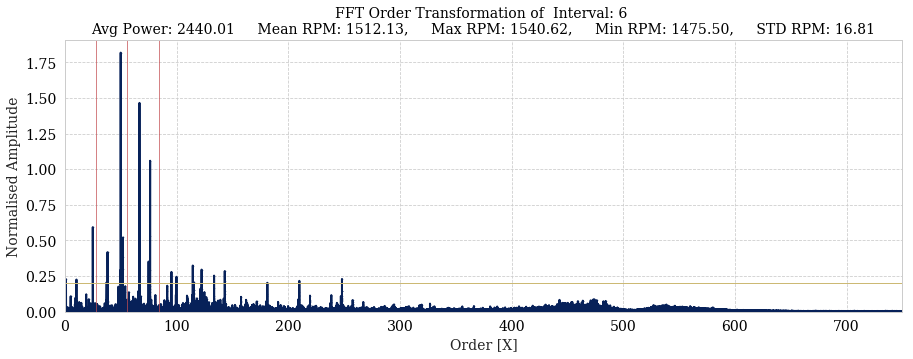

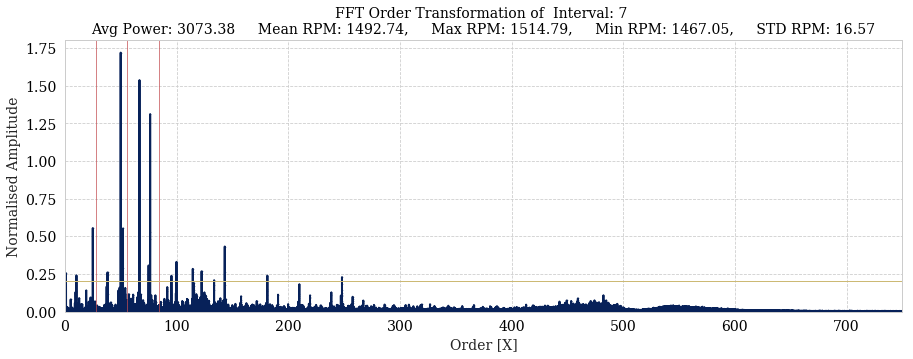

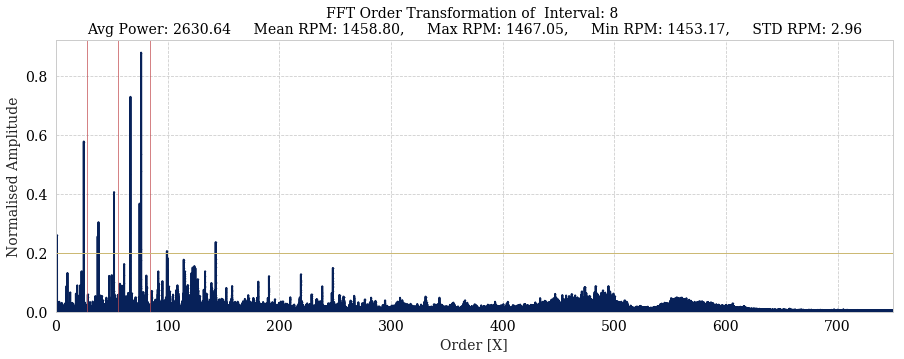

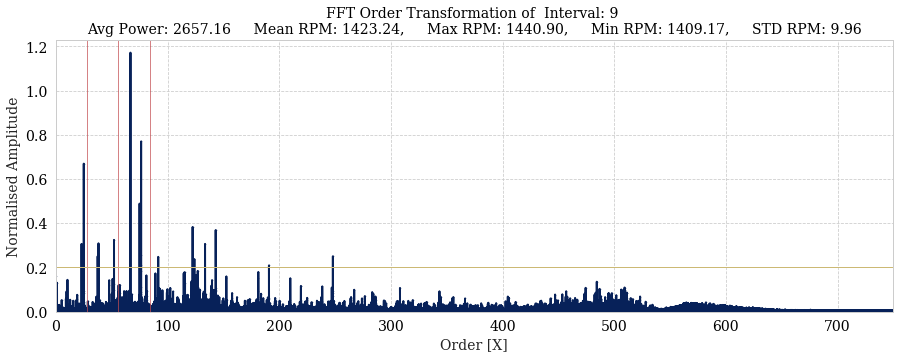

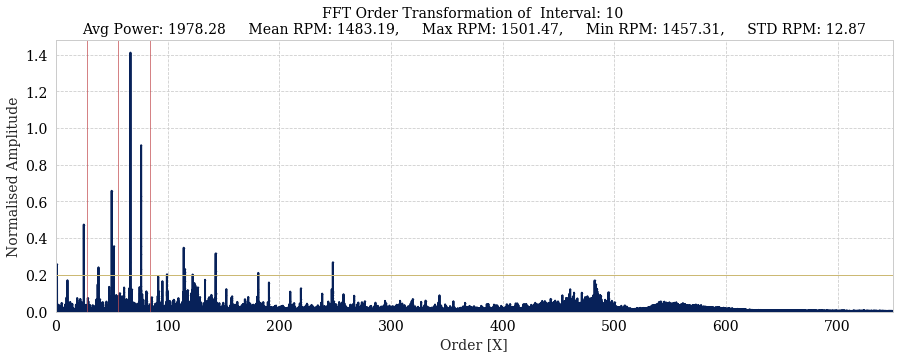

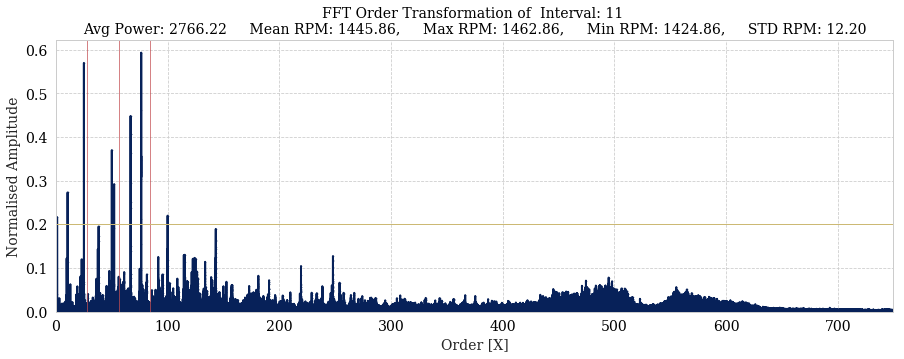

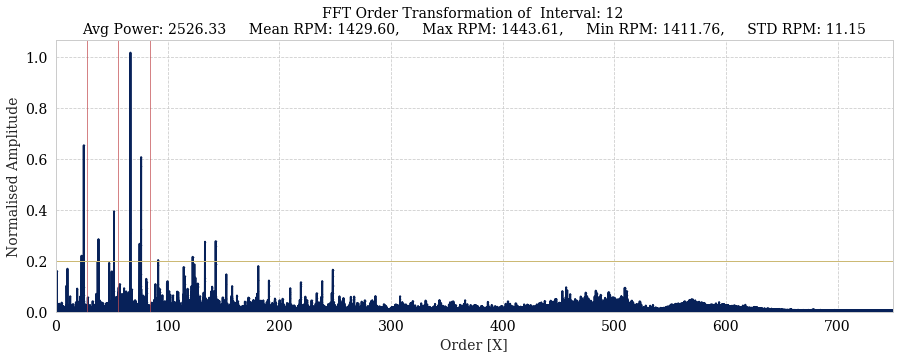

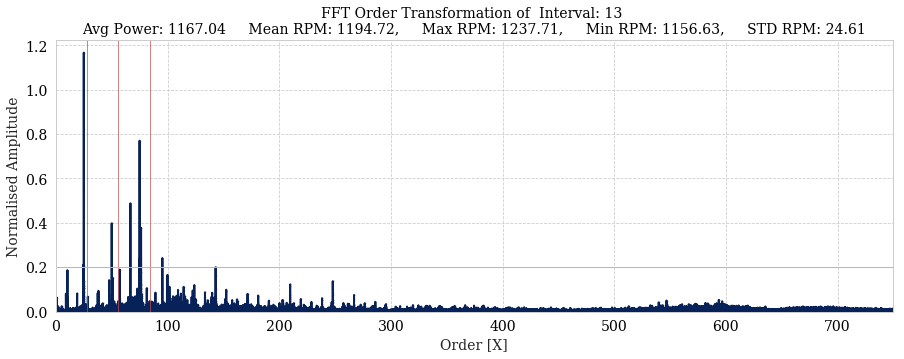

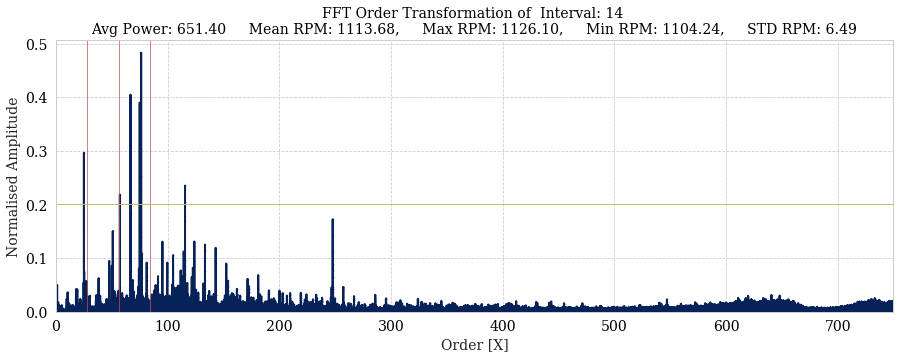

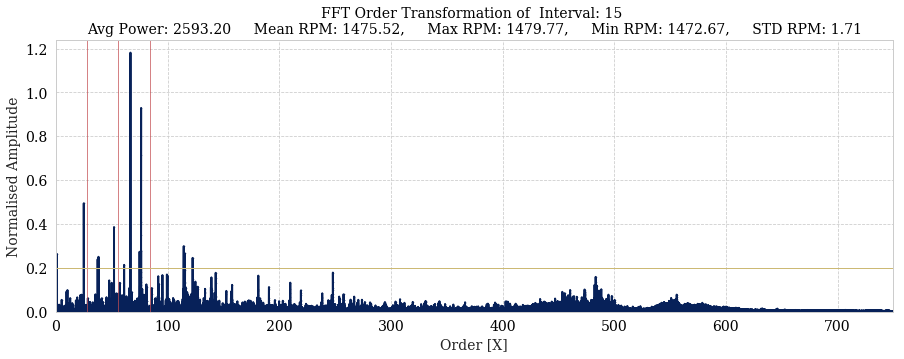

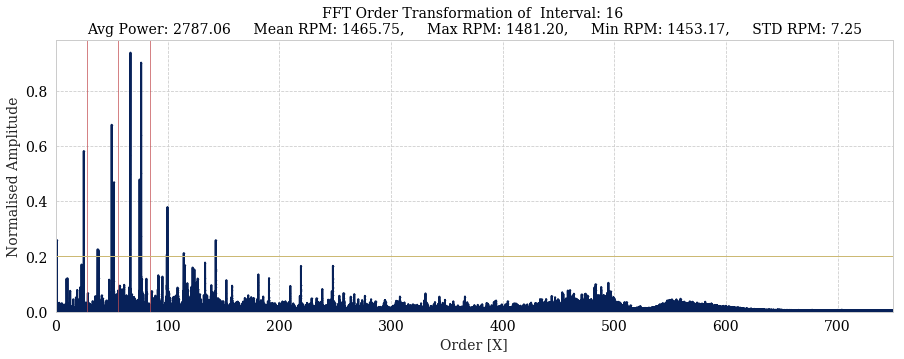

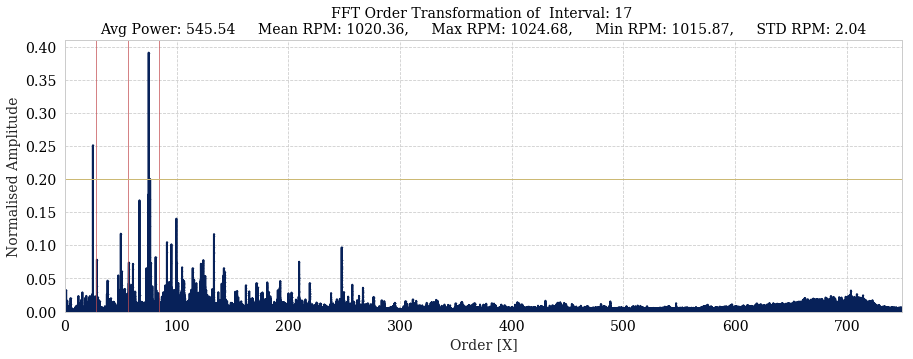

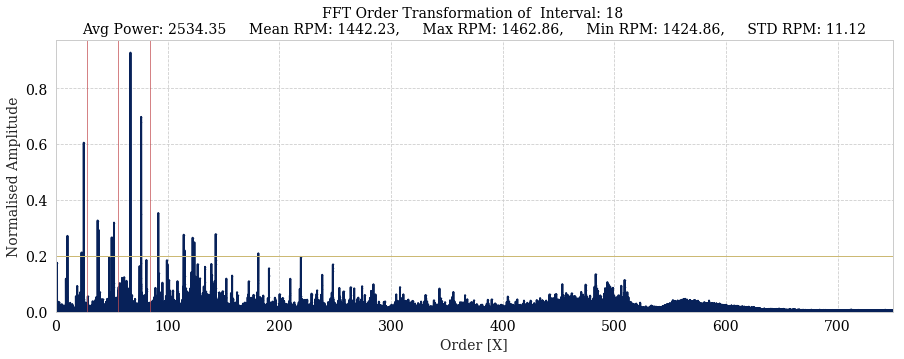

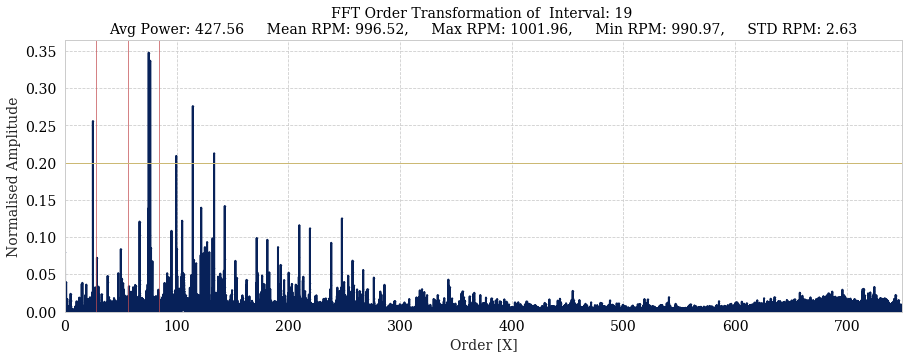

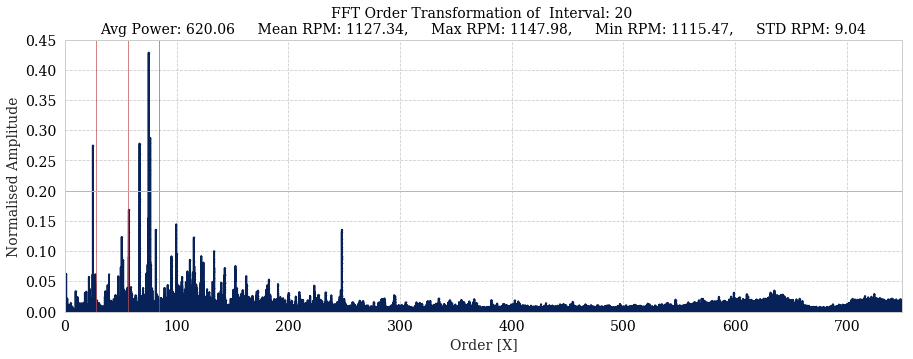

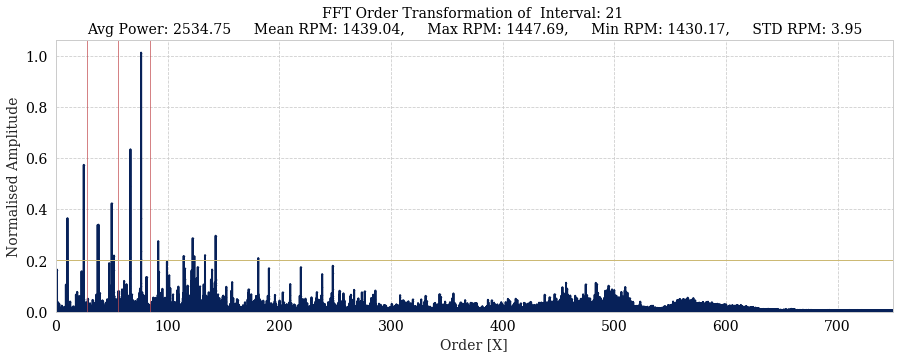

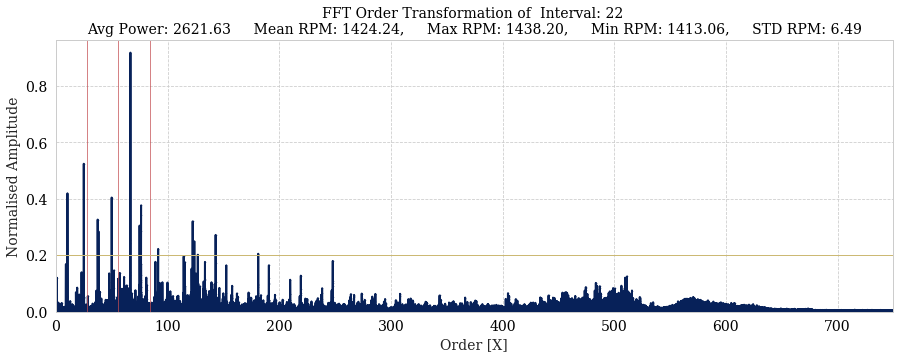

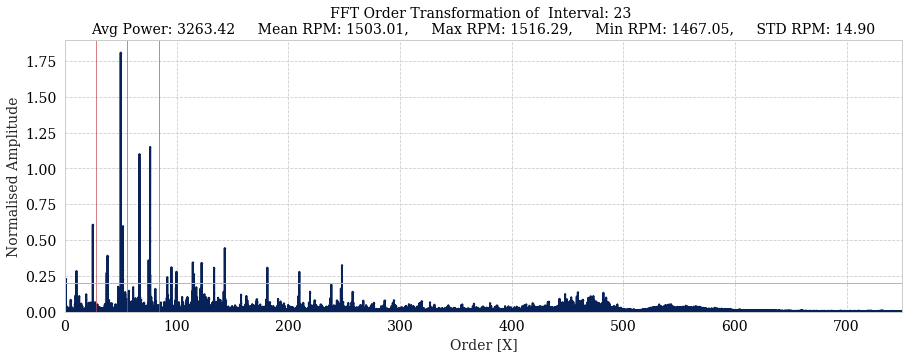

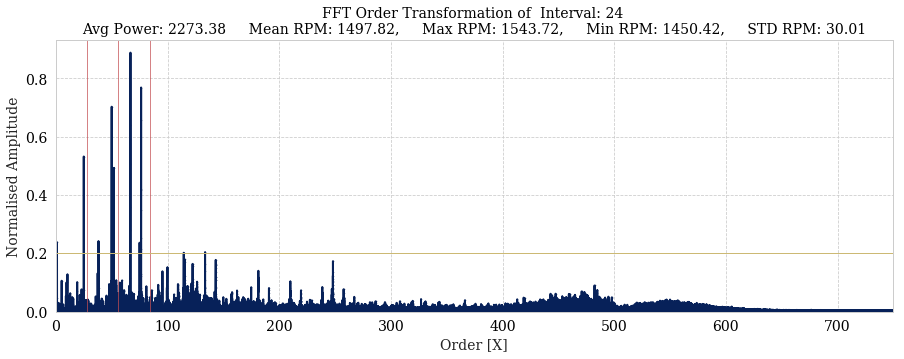

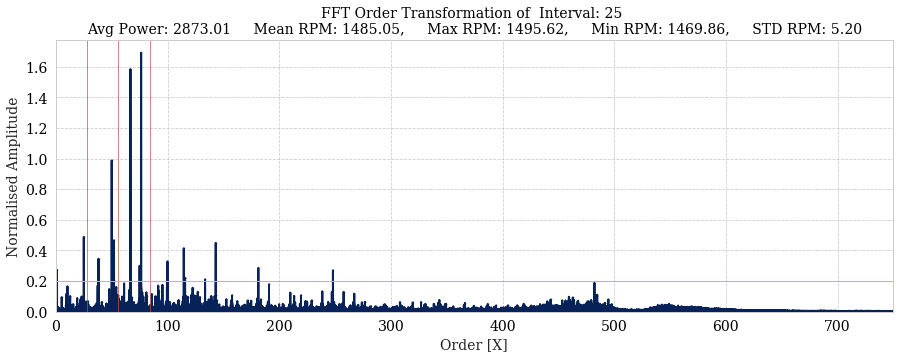

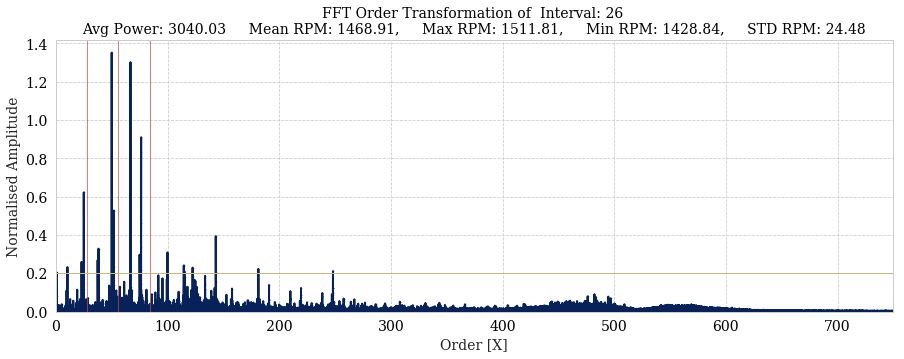

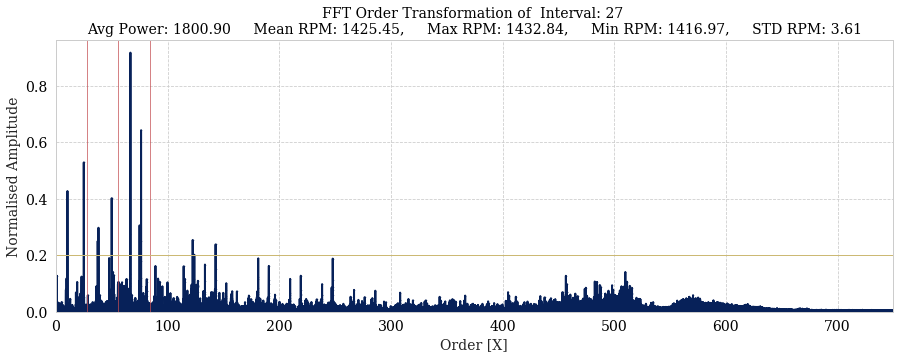

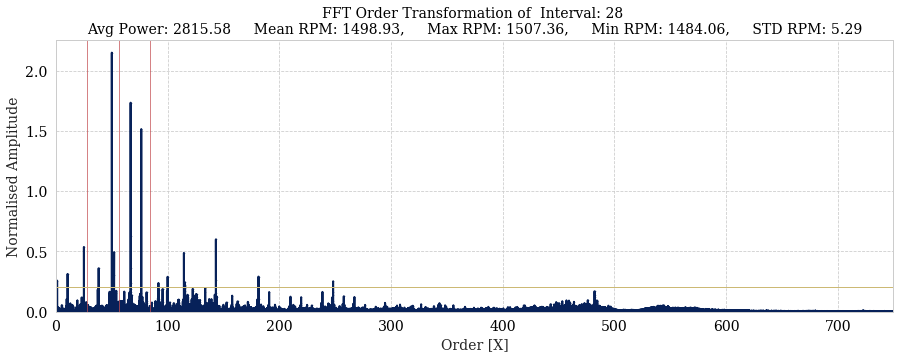

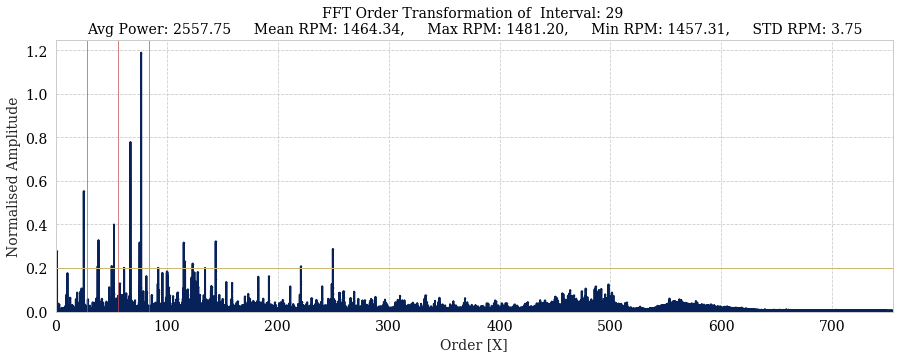

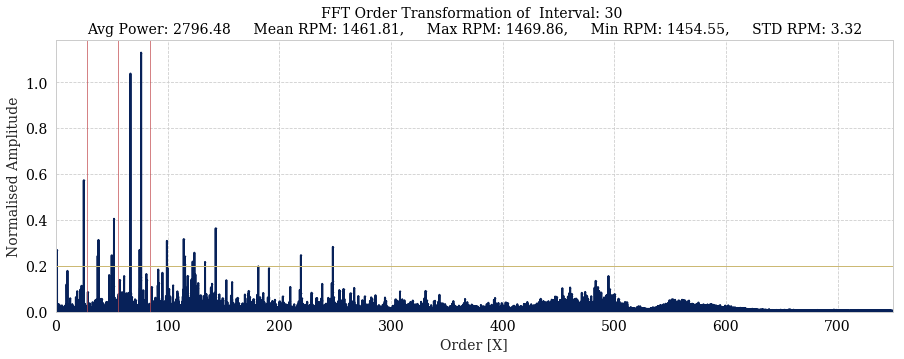

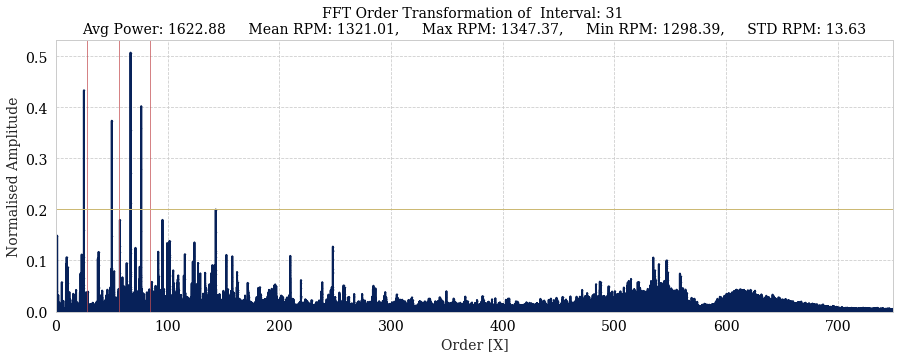

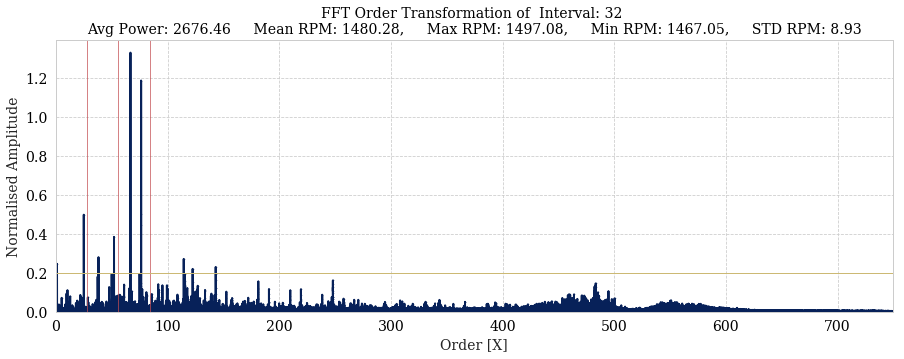

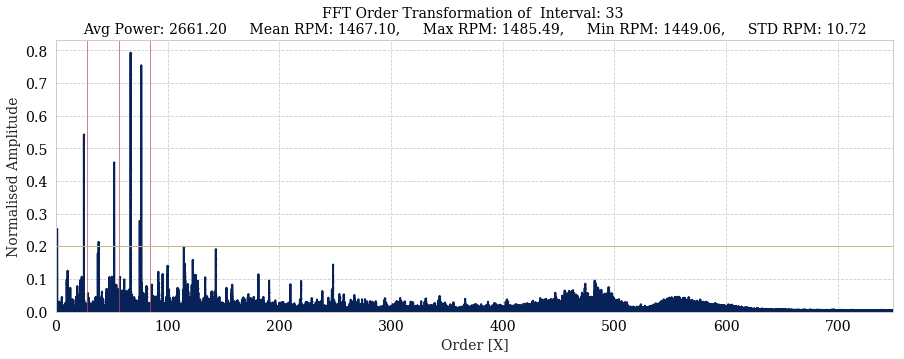

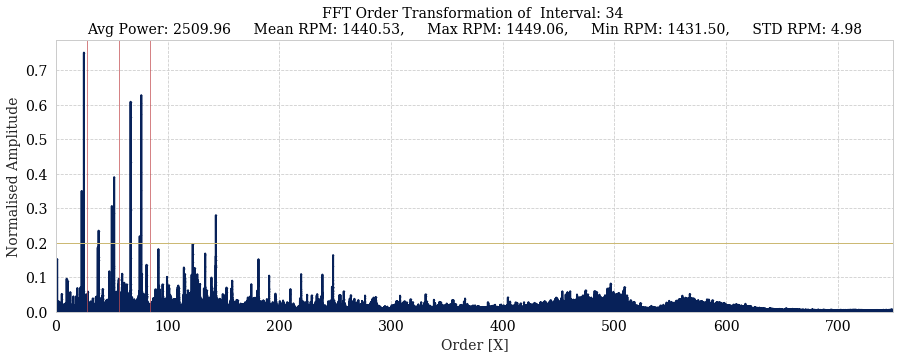

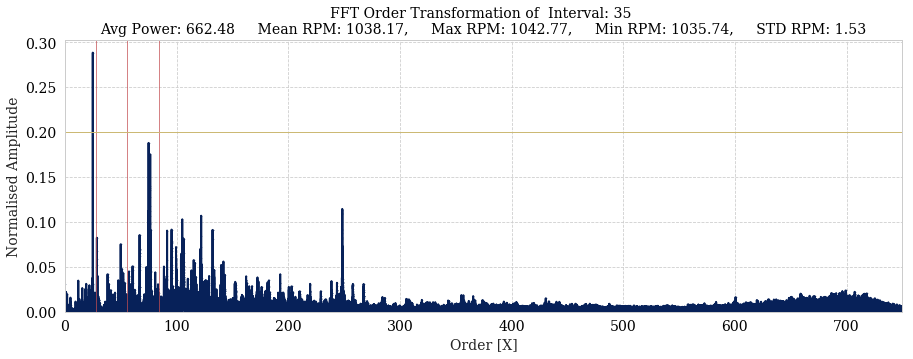

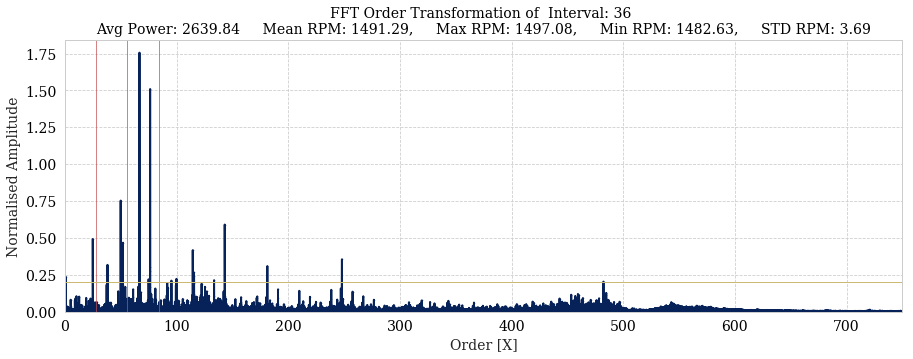

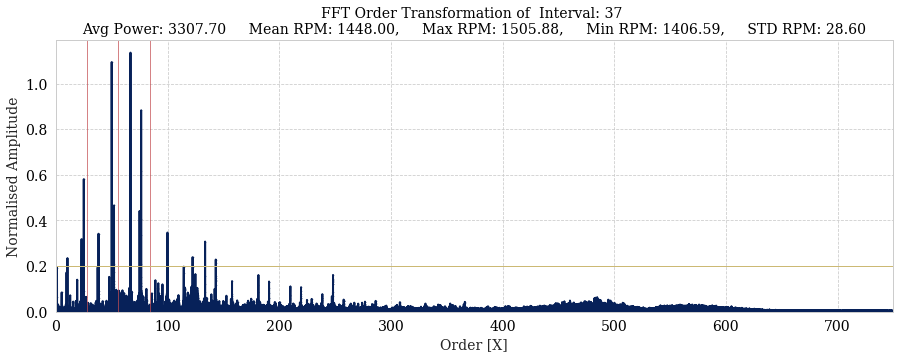

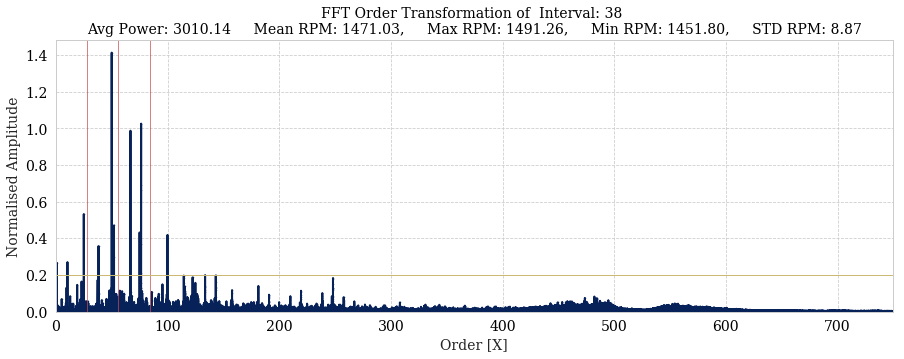

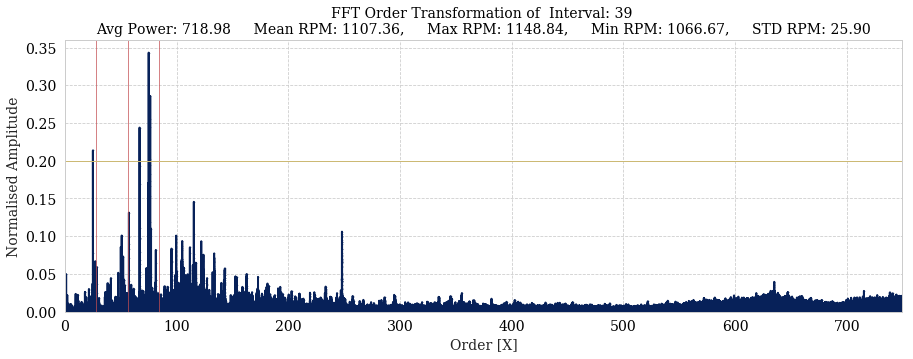

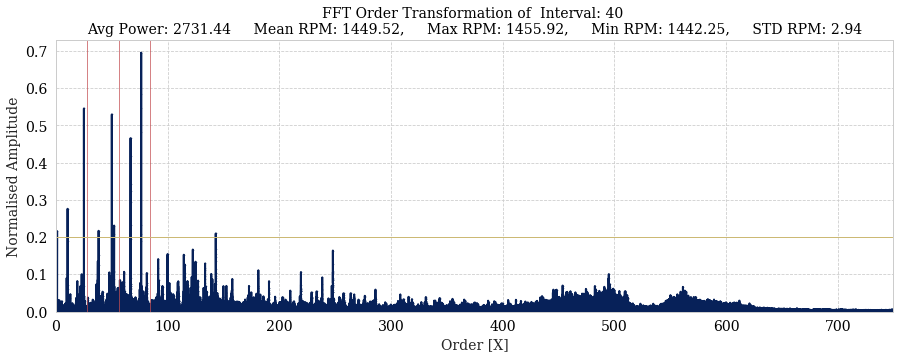

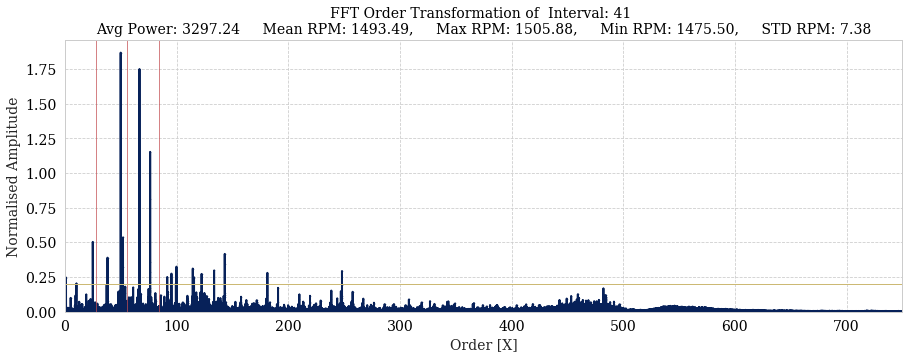

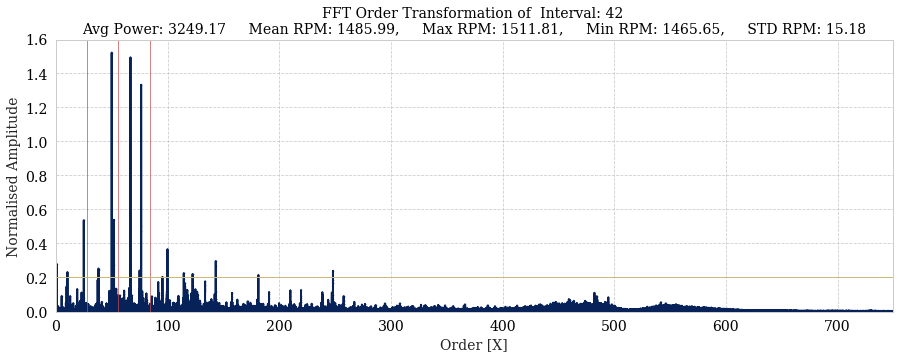

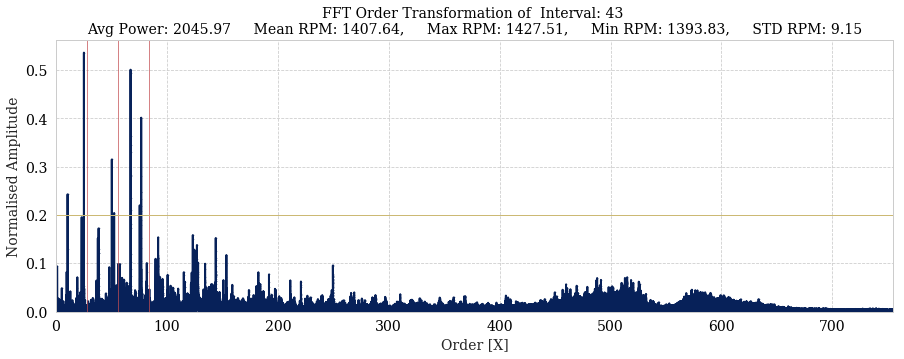

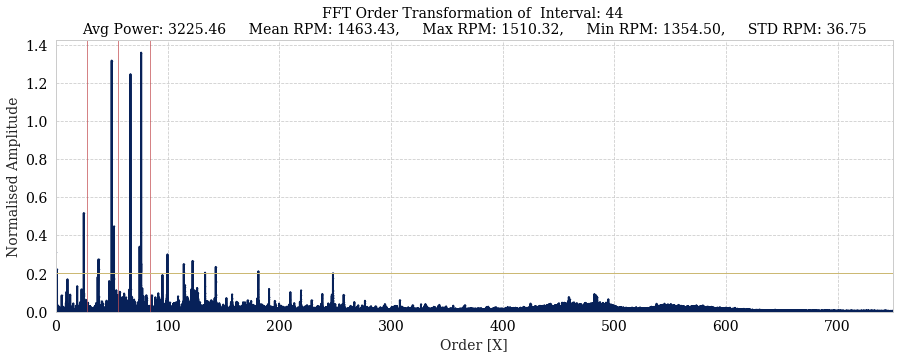

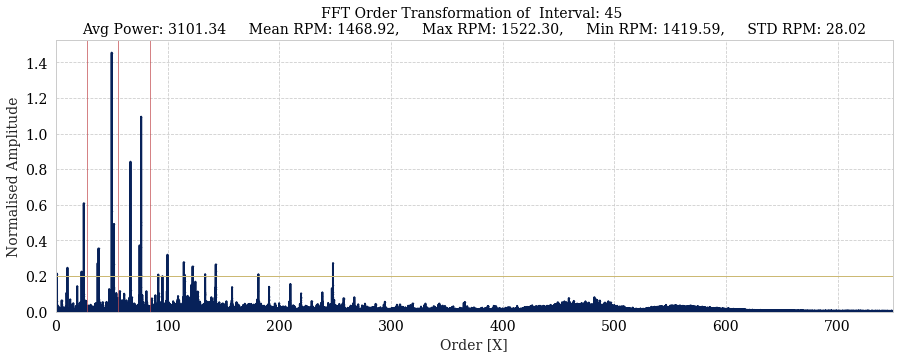

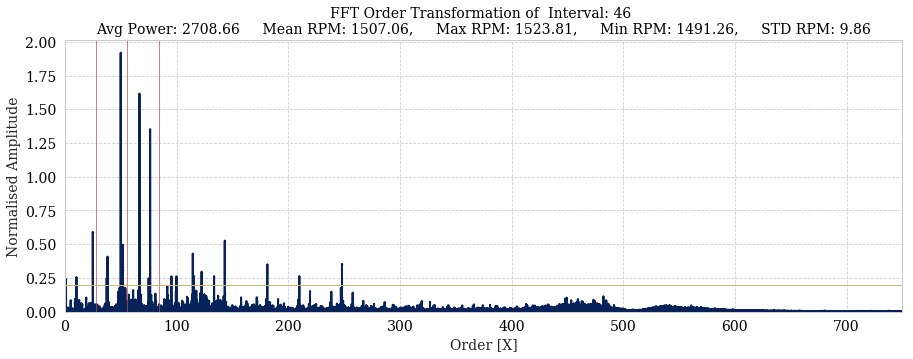

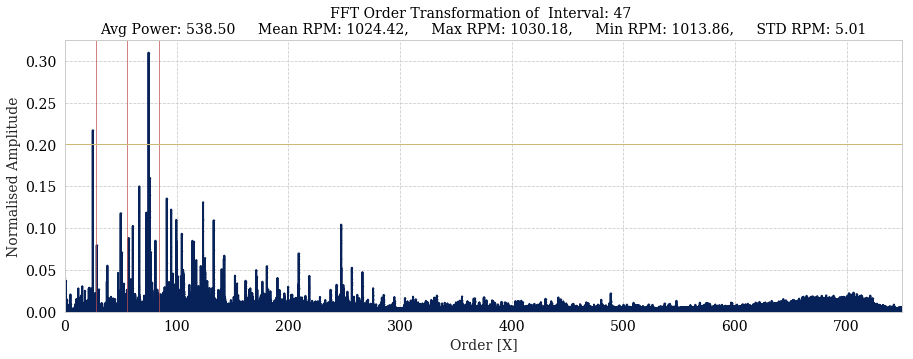

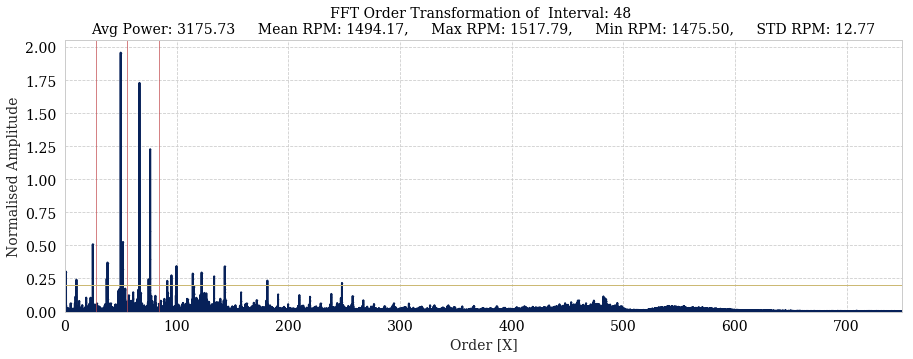

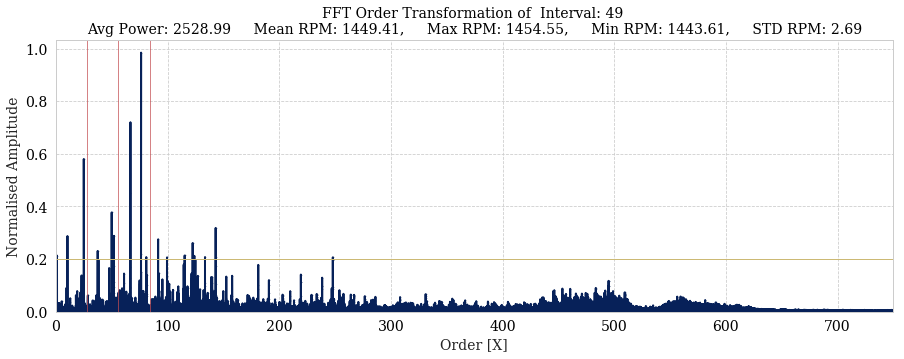

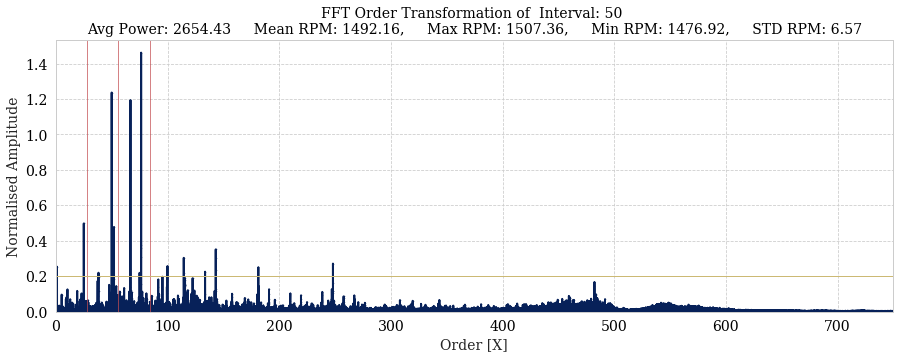

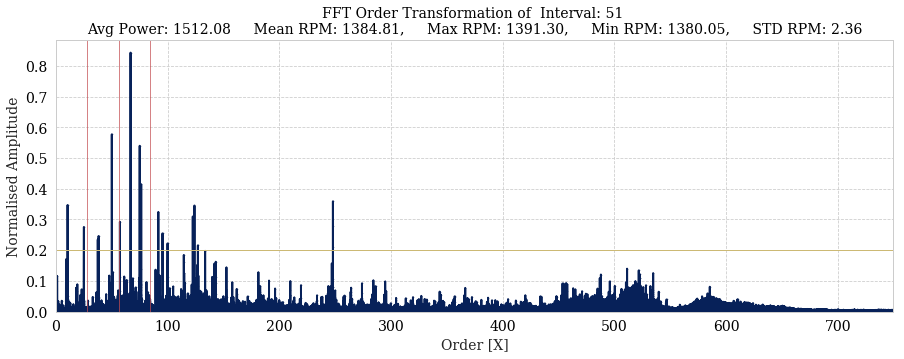

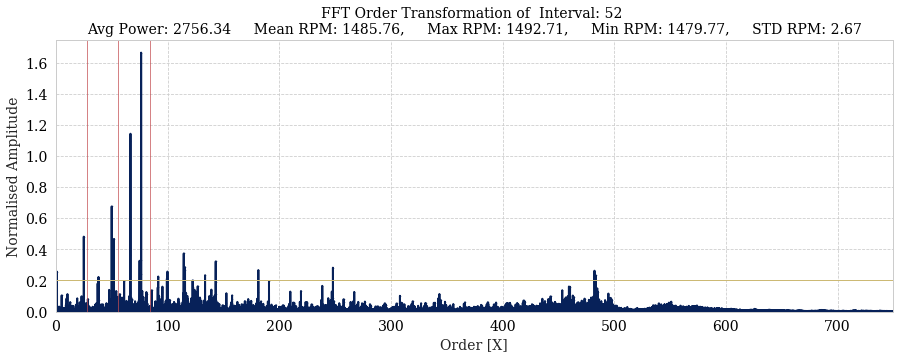

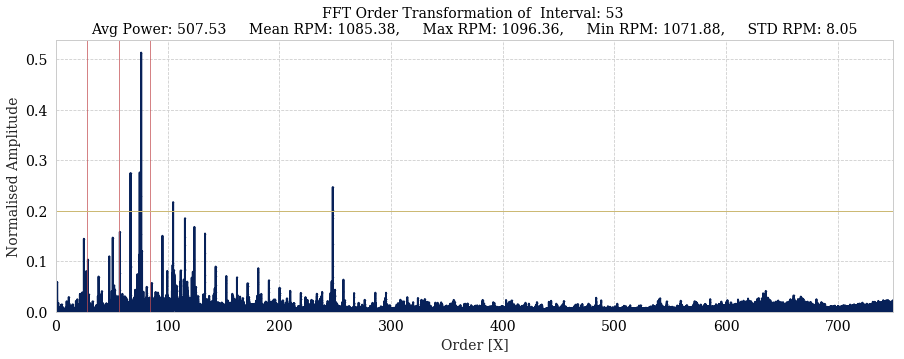

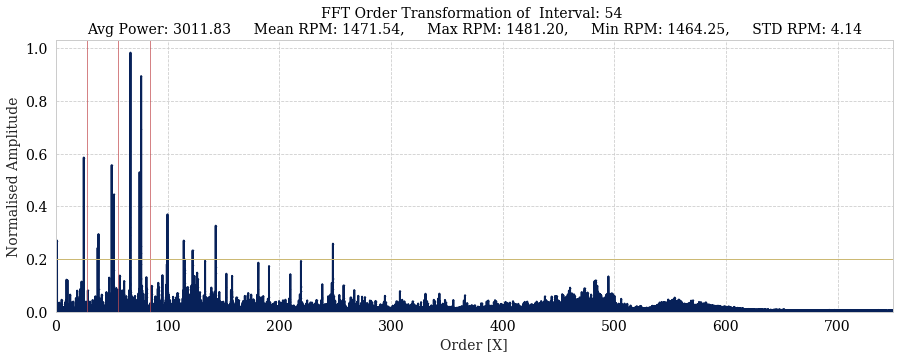

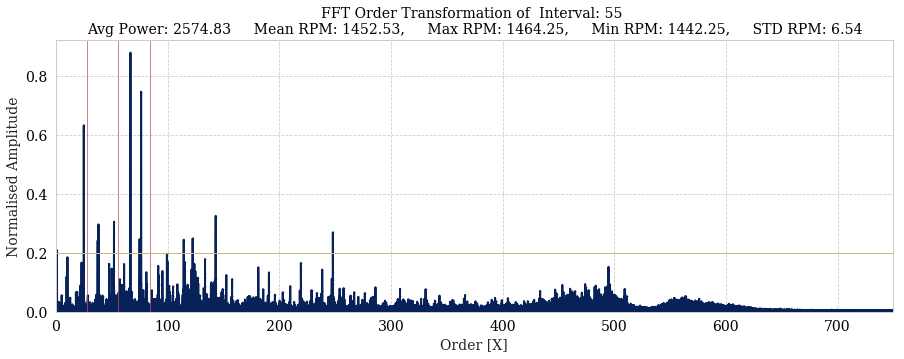

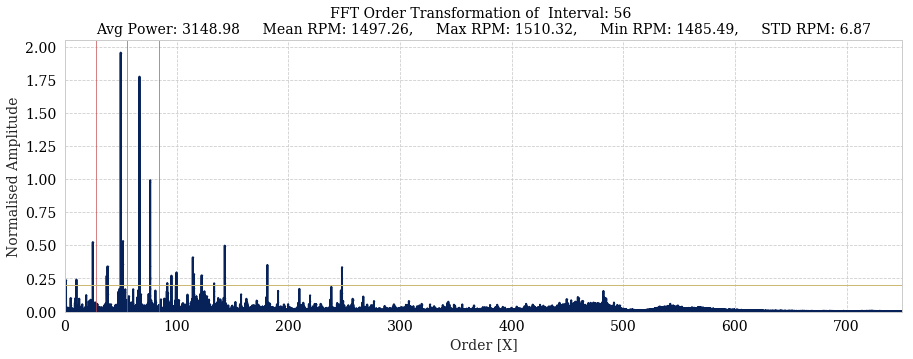

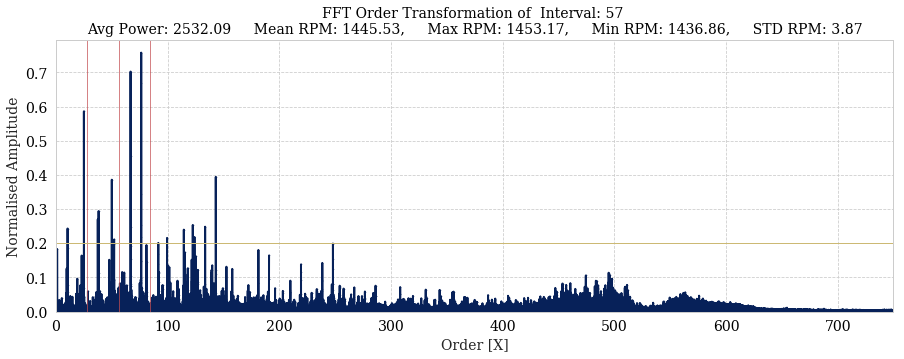

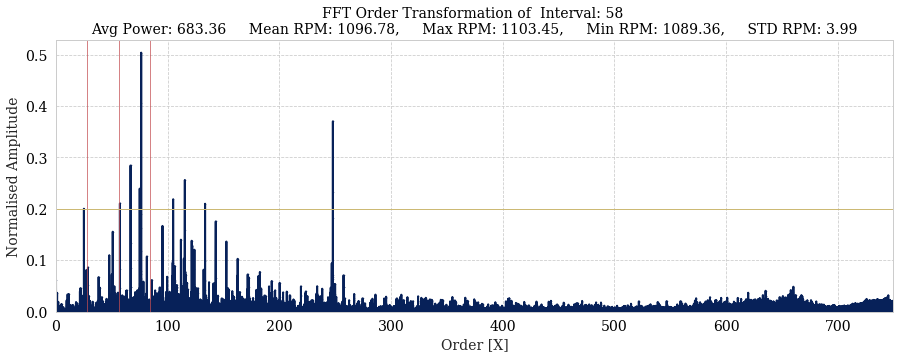

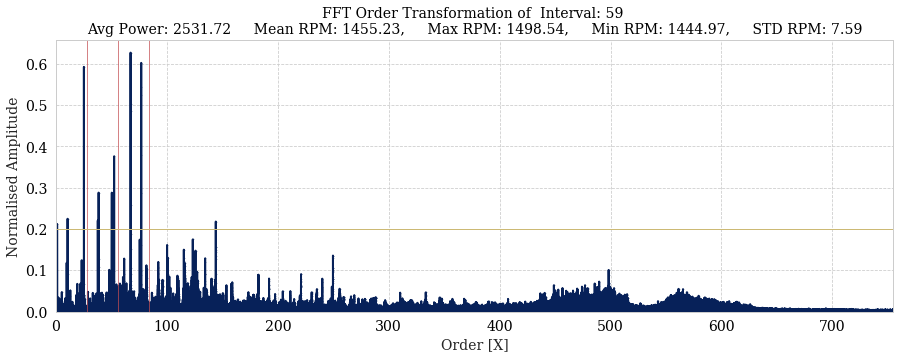

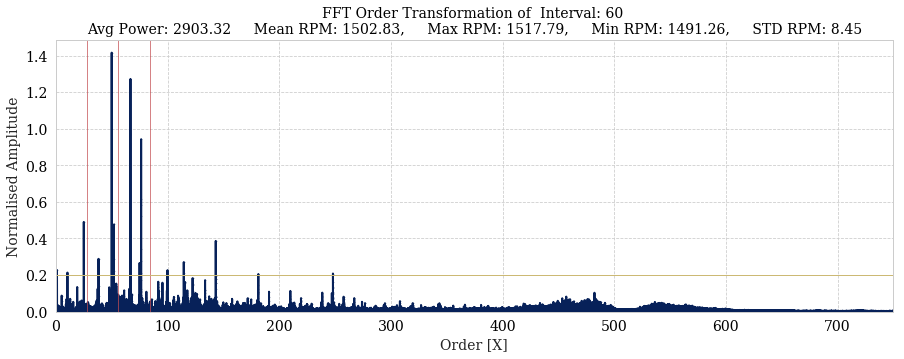

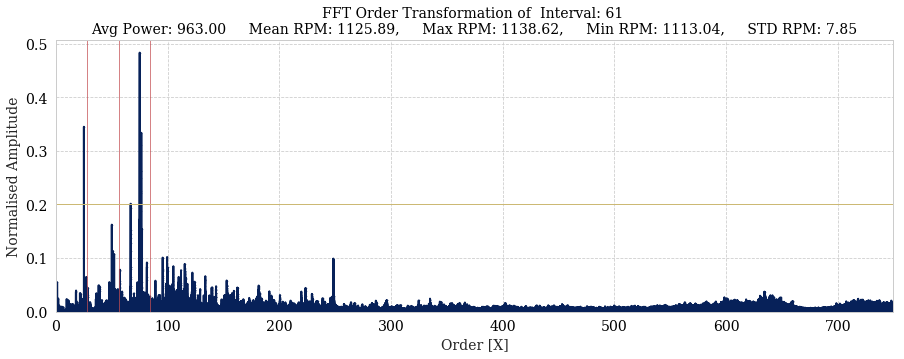

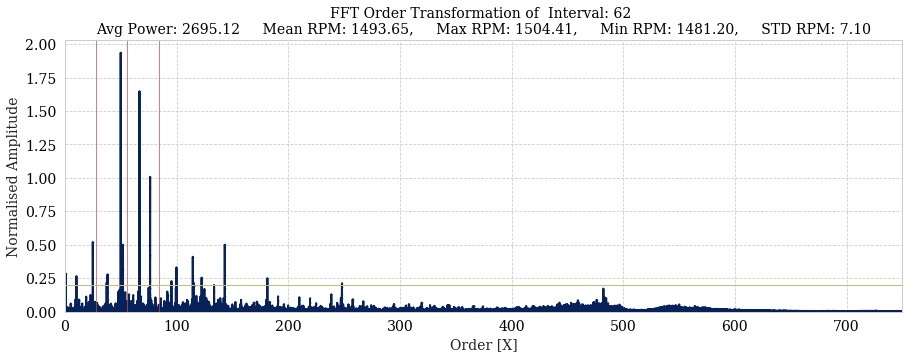

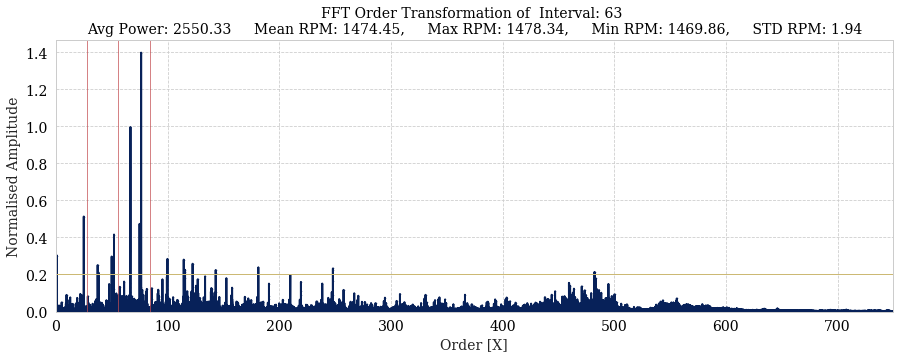

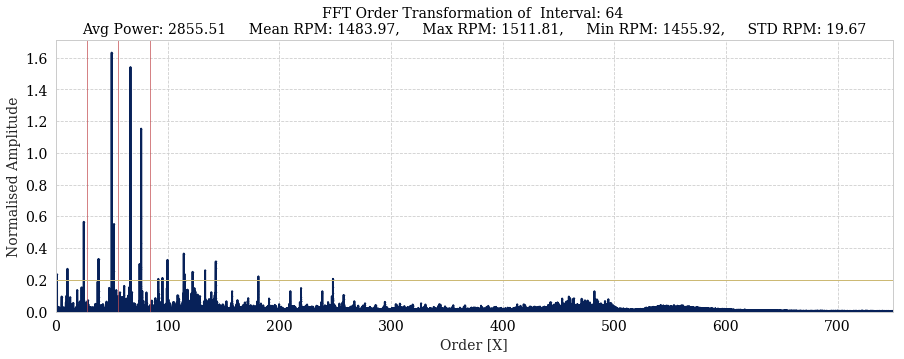

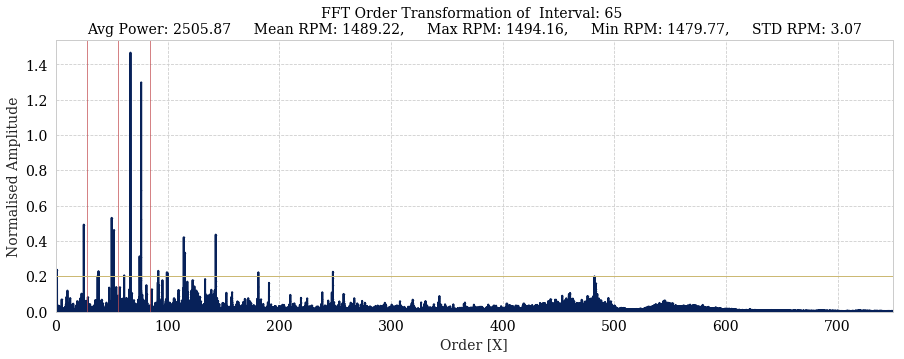

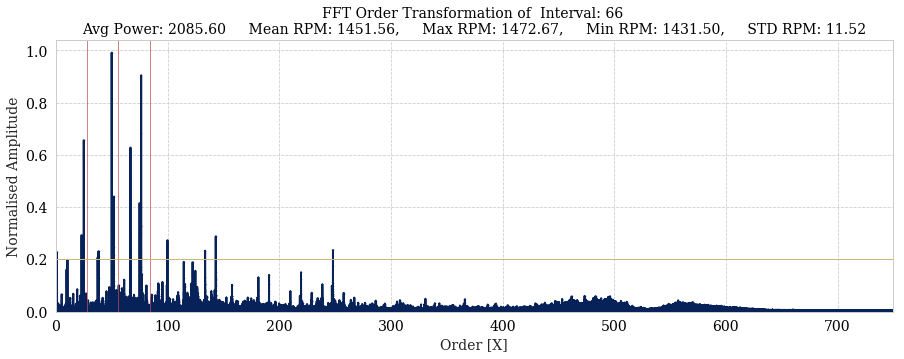

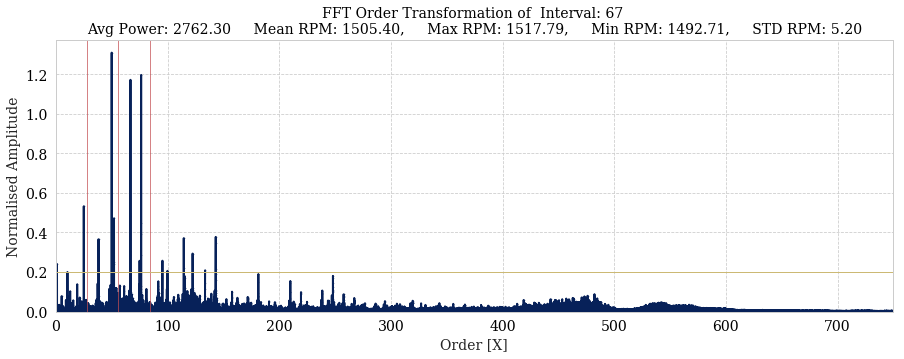

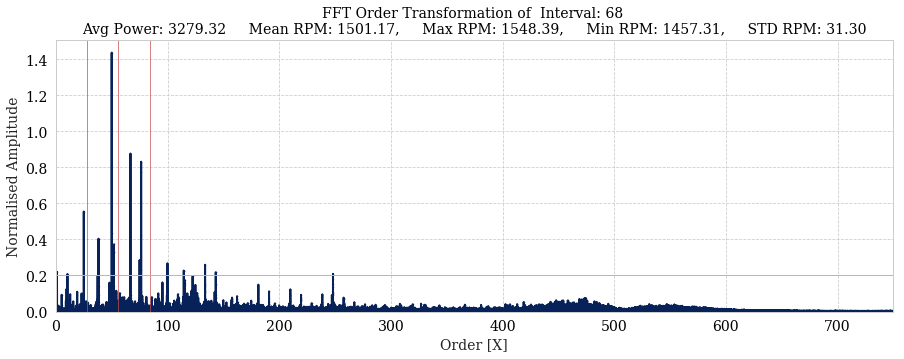

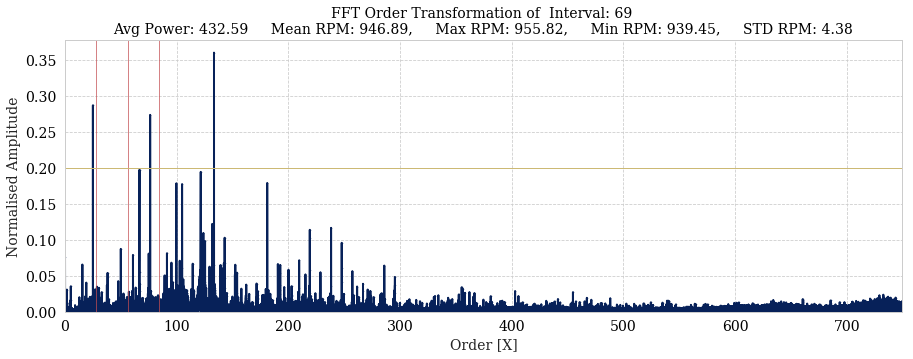

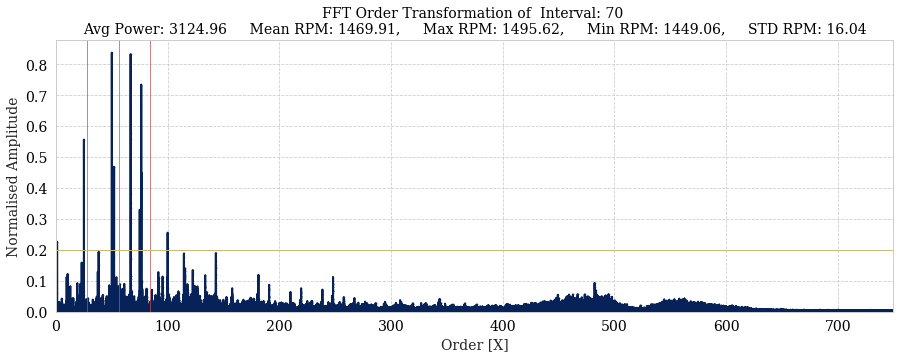

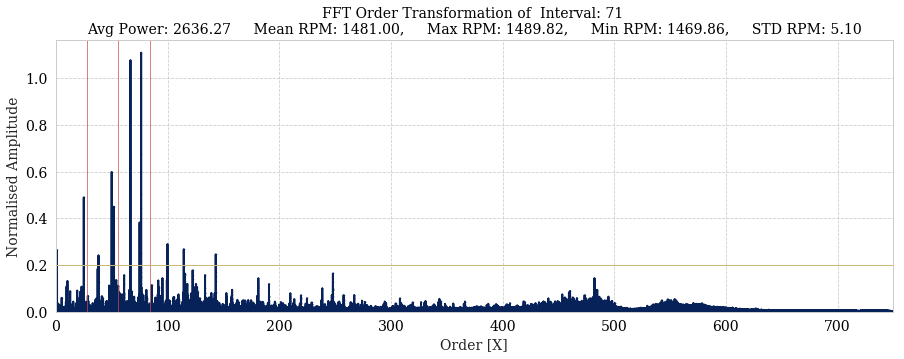

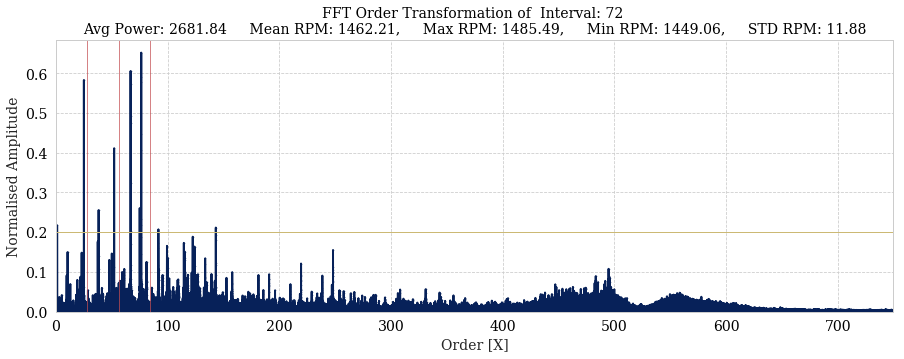

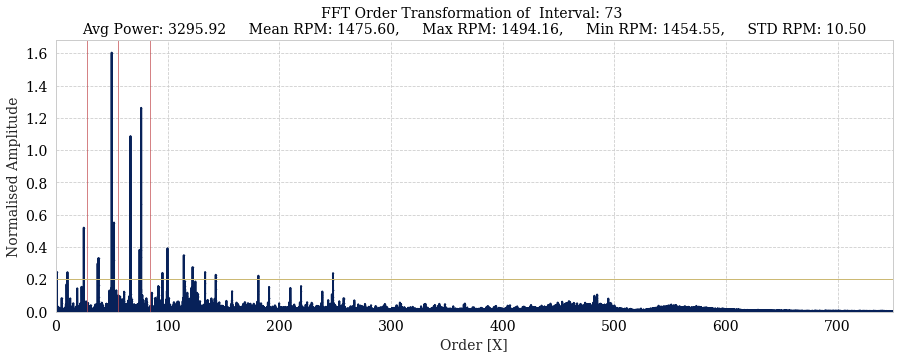

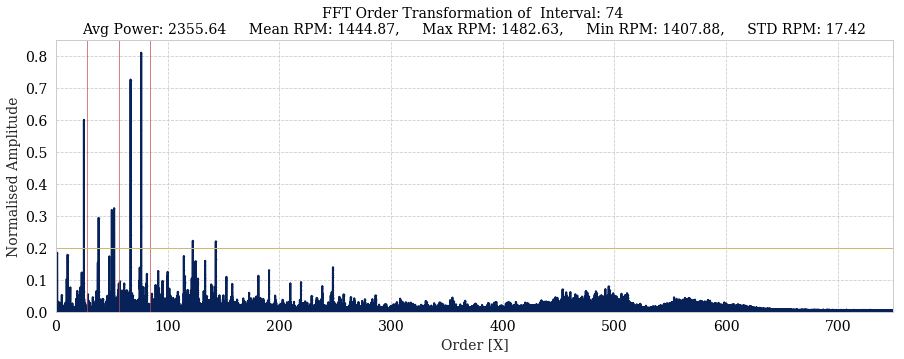

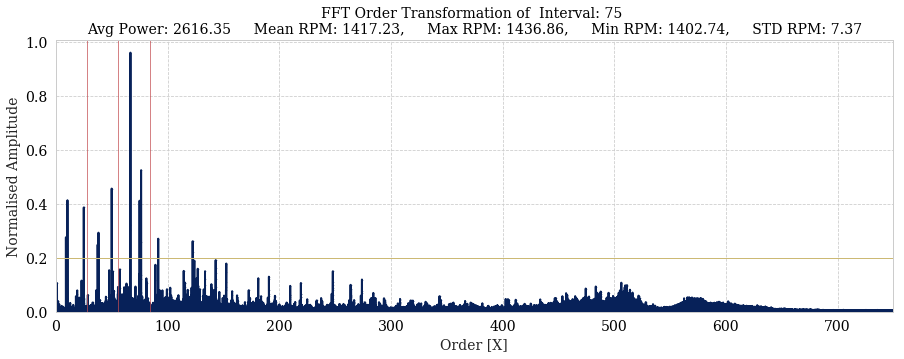

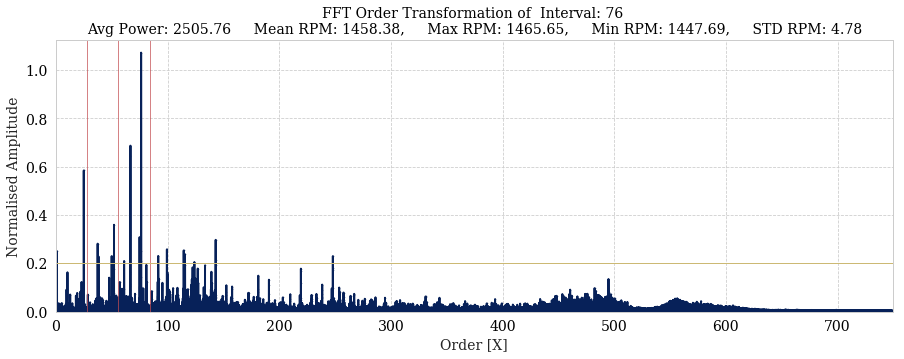

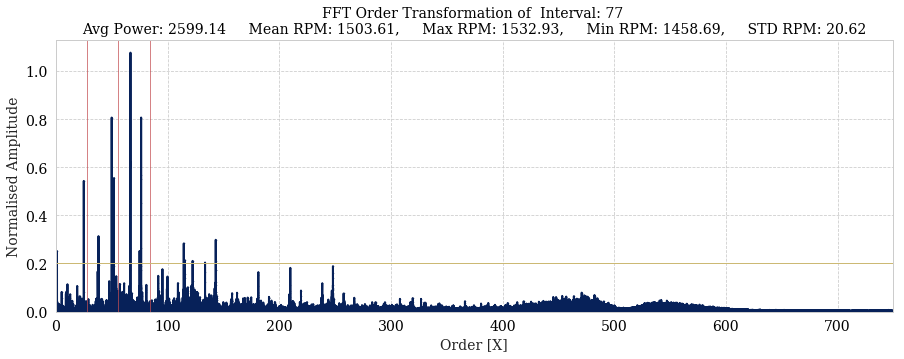

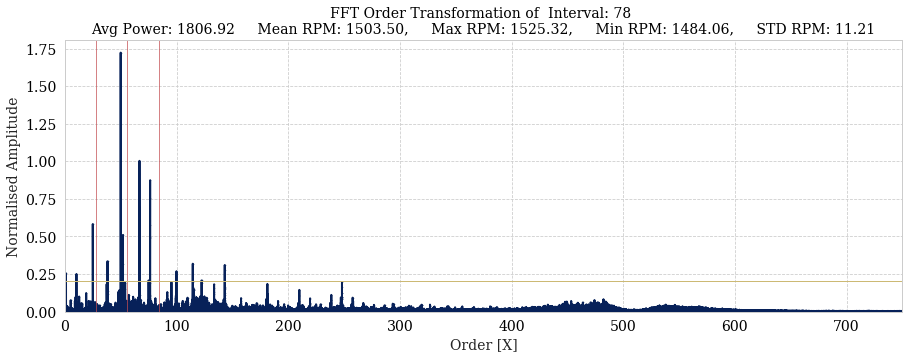

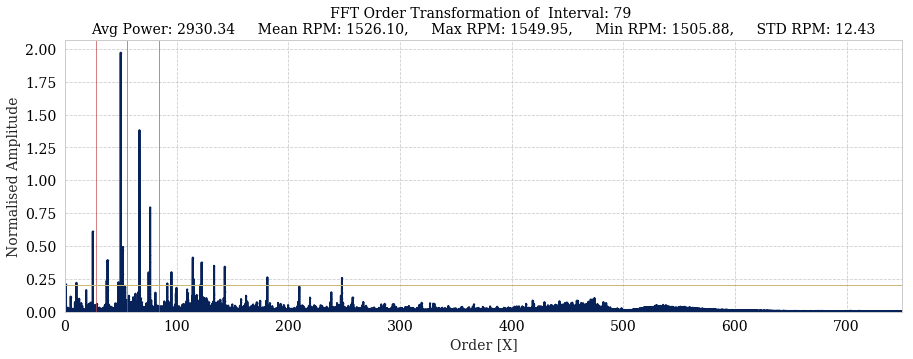

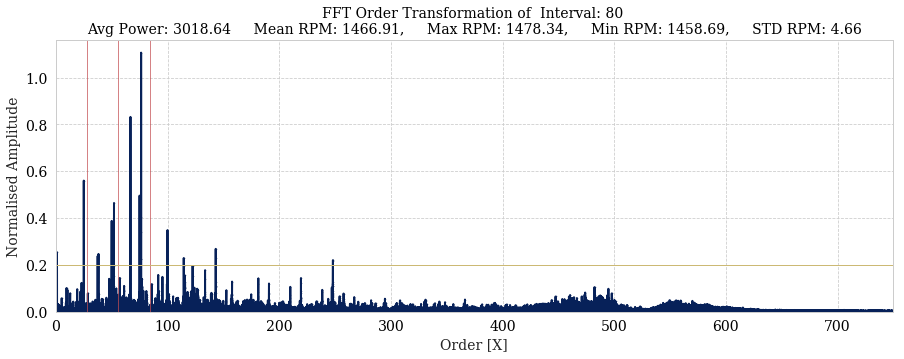

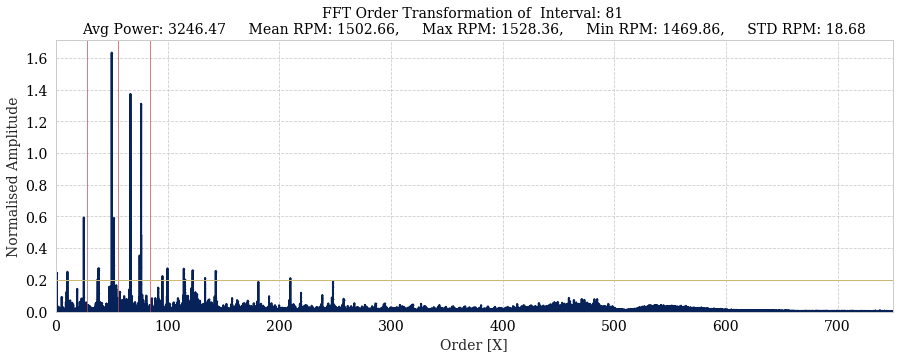

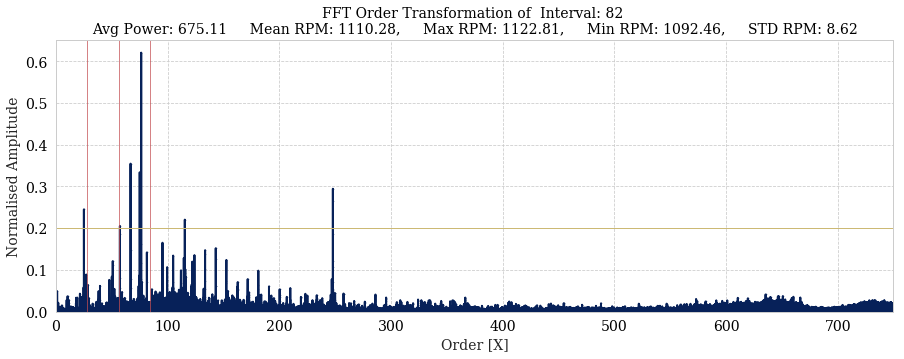

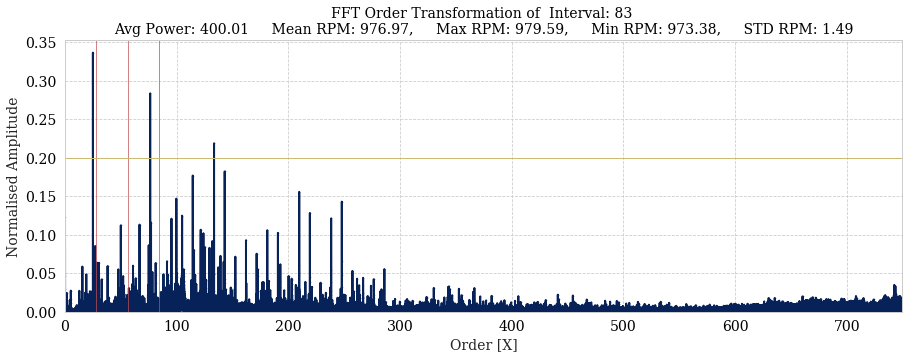

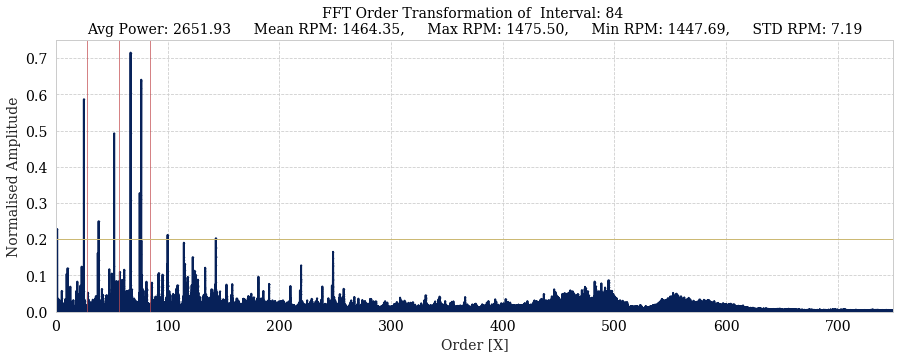

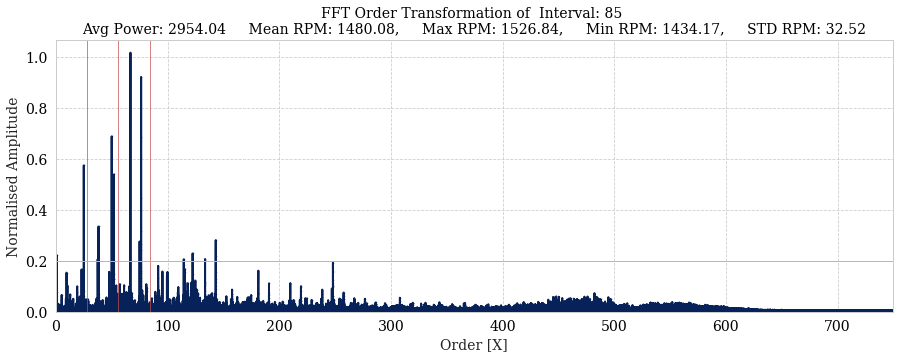

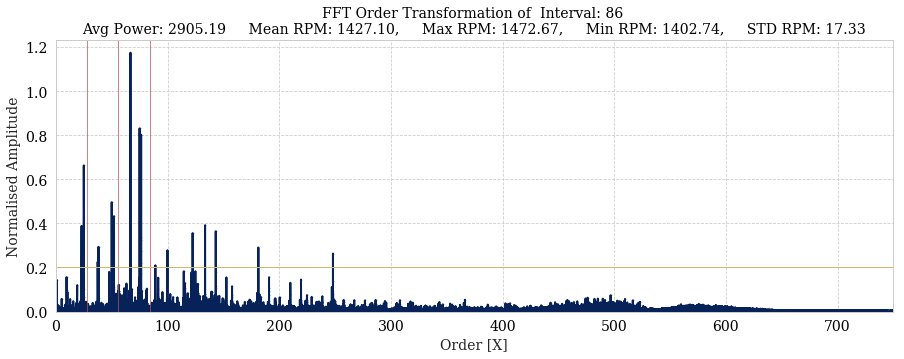

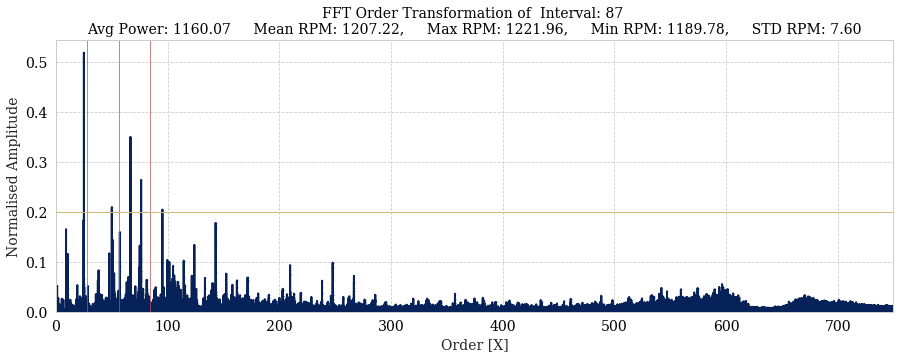

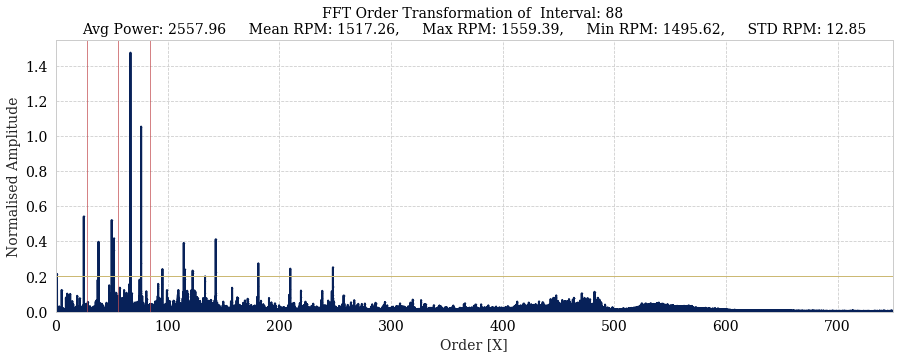

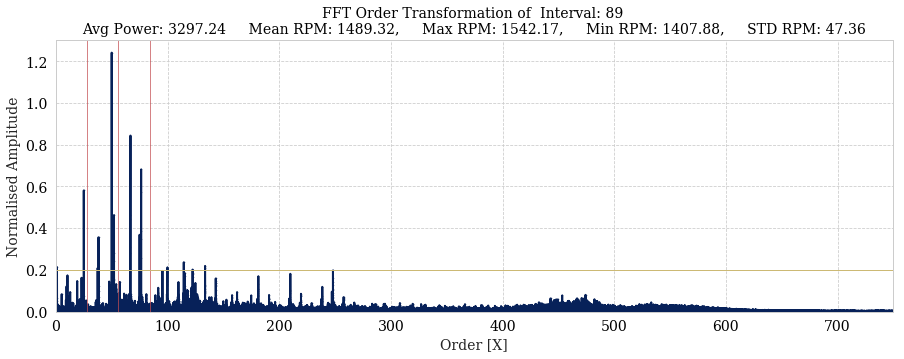

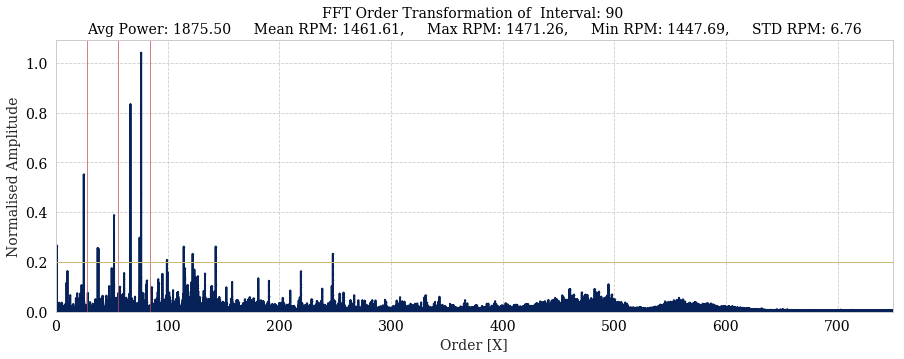

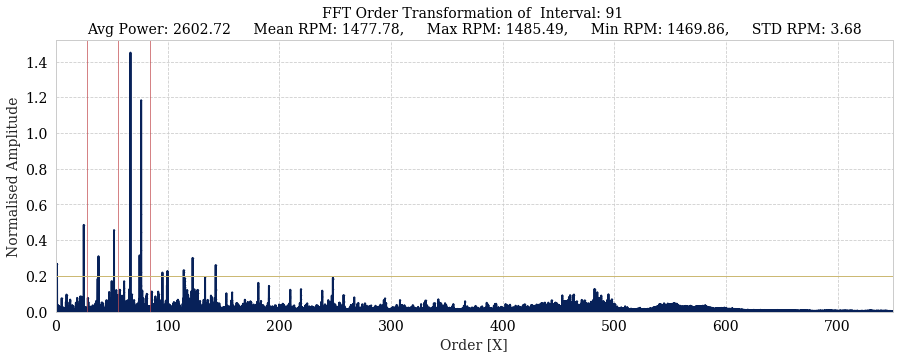

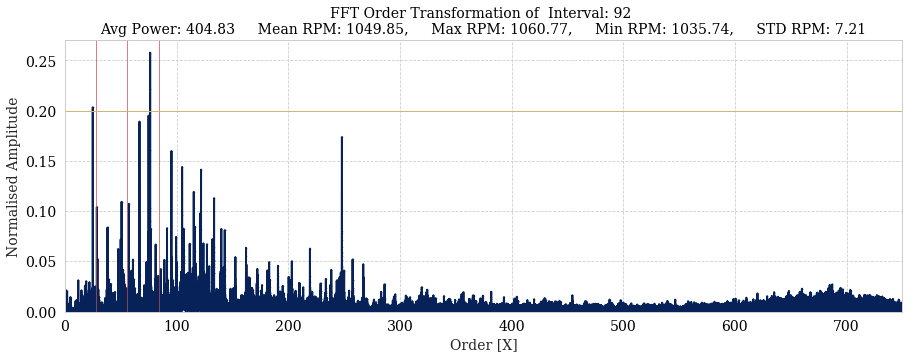

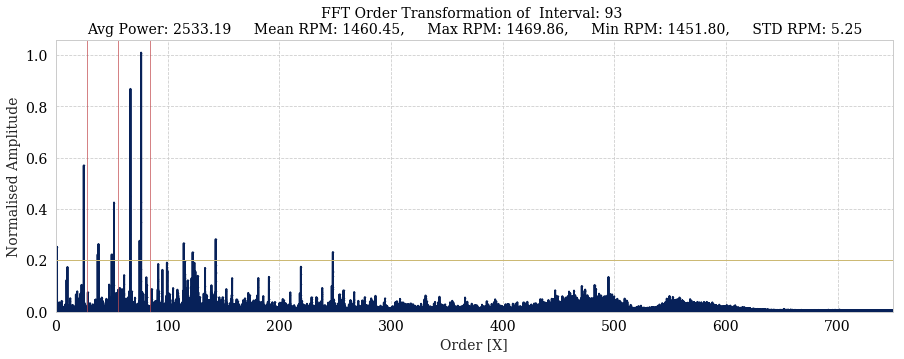

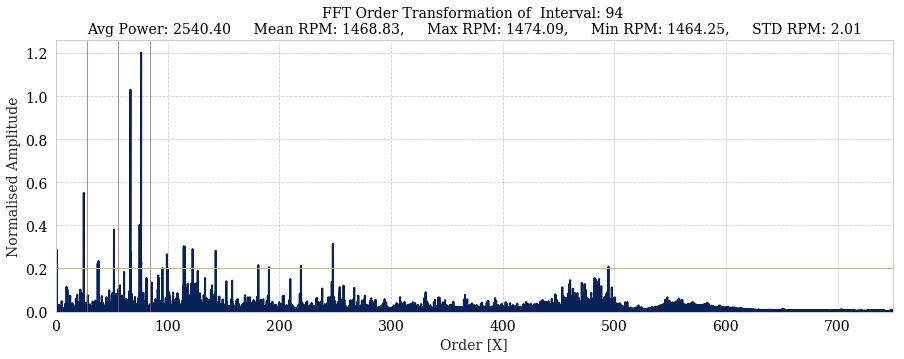

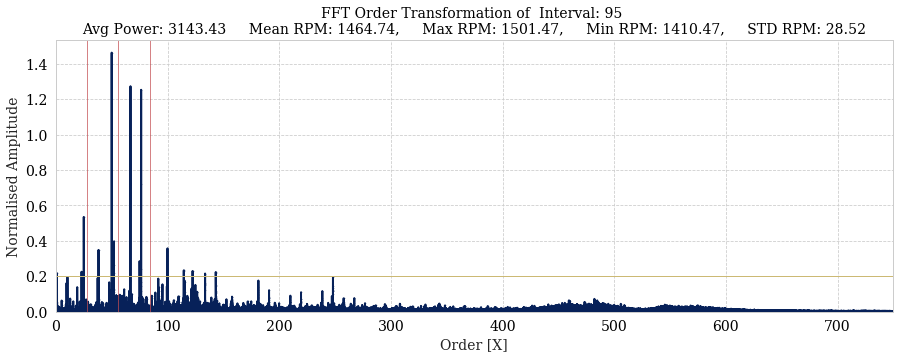

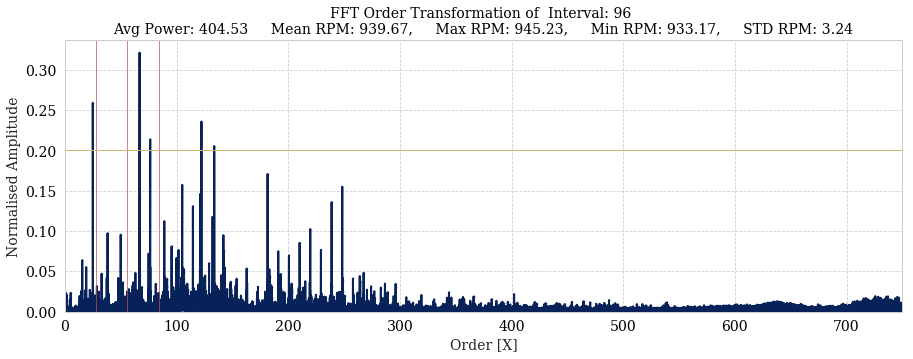

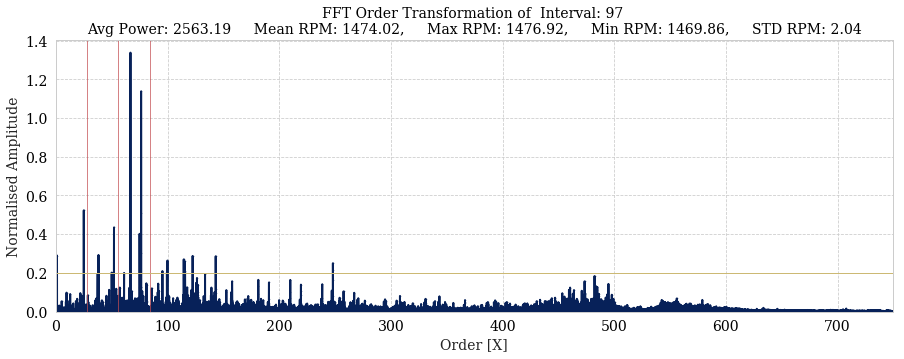

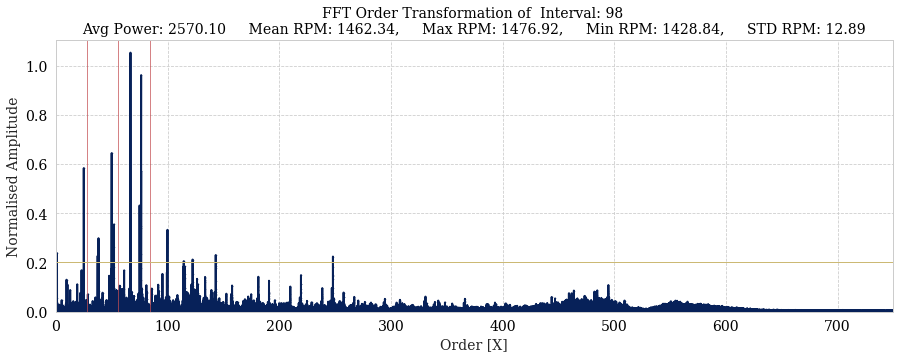

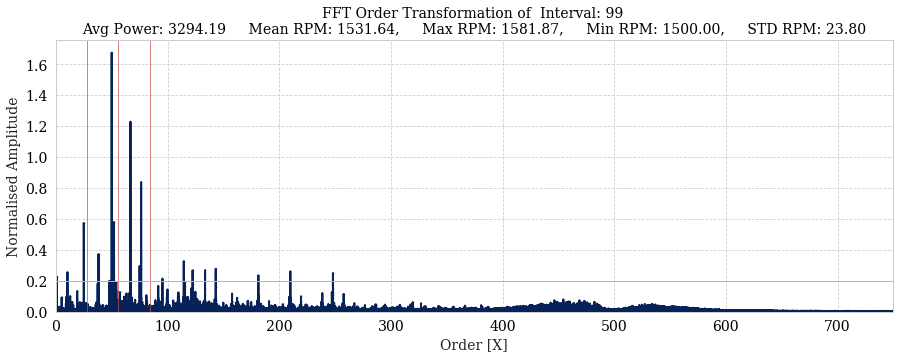

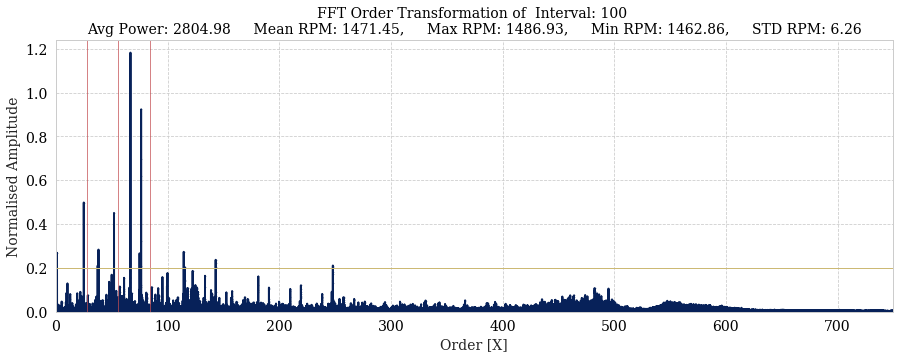

In [5]:
intervals = wt_instance.ten_second_intervals
sensor_name = 'GbxHssRr;0,0102;m/s2'
type = 'gearbox'
power_threshold = 0

for i, interval in enumerate(intervals):
    if i > 100:
        break
    
    if (interval.sensor_df.shape[1]) == 14 and (interval.op_df["PwrAvg;kW"][0] > power_threshold):
        time_stamps = interval.sensor_df['TimeStamp']
        vibration_signal = interval.sensor_df[sensor_name]
        rot_data = interval.high_speed_rot_data
        peak_array = interval.high_speed_peak_array
        avg_power = interval.op_df["PwrAvg;kW"][0]

        time_resampled, y_resampled, all_time_resampled, all_y_resampled = resample.linear_interpolation_resampling(time_stamps,
                                                                                                          vibration_signal,
                                                                                                          peak_array, 1500,
                                                                                                          round_plots=3,
                                                                                                          plotting=False,
                                                                                                          name=sensor_name)


        fast = ff_transform.FastFourierTransform(all_y_resampled, all_time_resampled, type)
        fast.fft_transform_order(rot_data, avg_power, i, plot=True, x_lim=None)

### Plotting order spectrum (zoomed in)
All colored lines are based upon Wind Turbine 2. <br>
First red line: first common order: 28 <br>
Second red line: second common order: 56 <br>
Third red line: third common order: 84 <br>
Horisontal yellow line: 0.2  

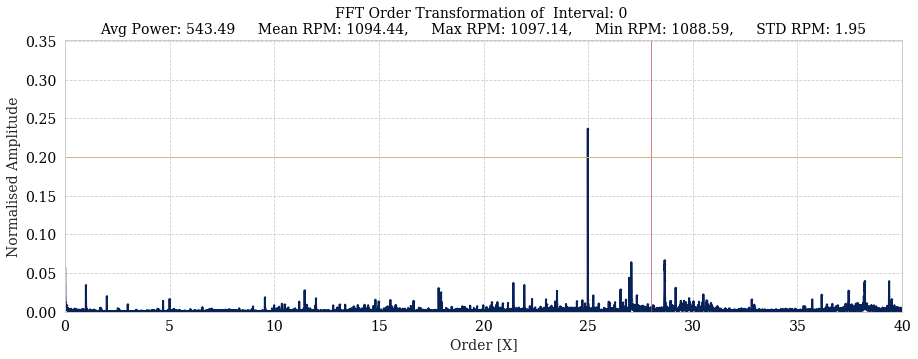

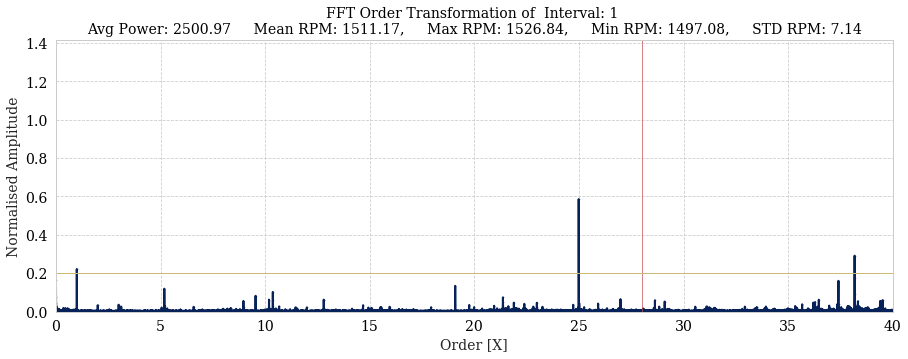

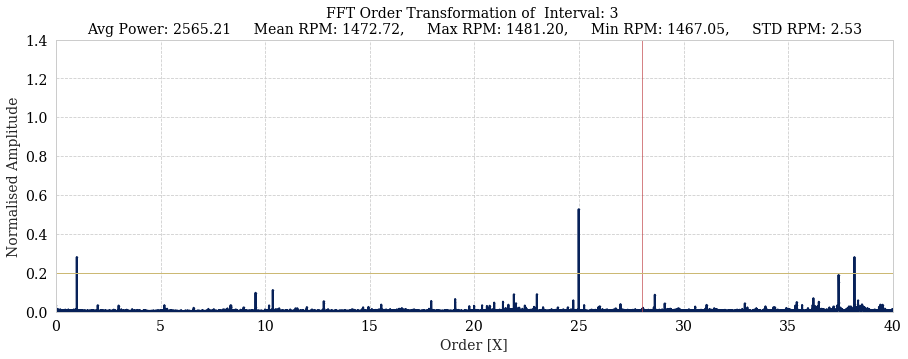

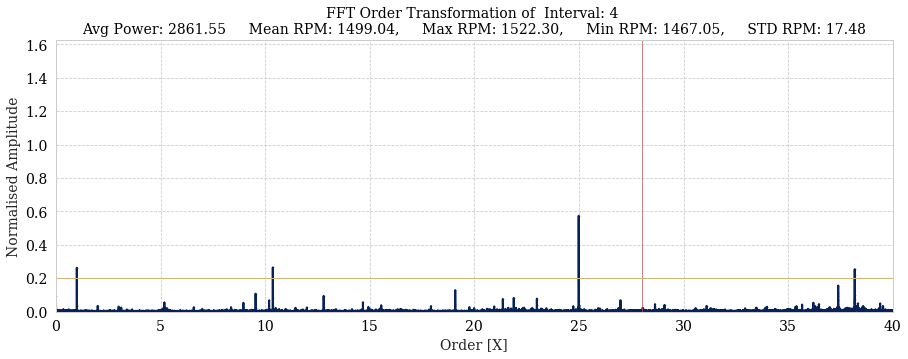

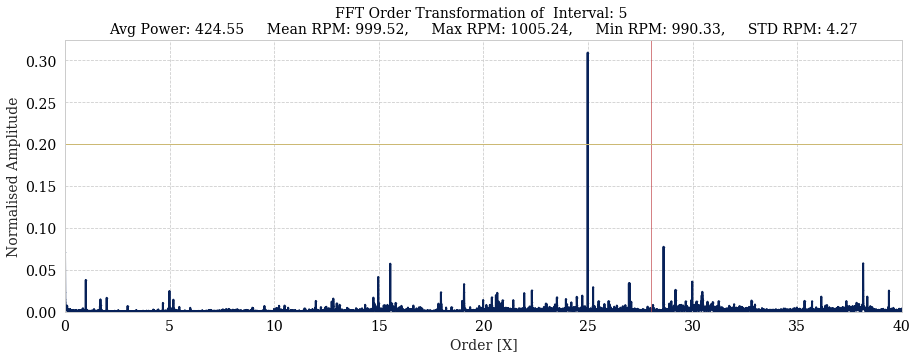

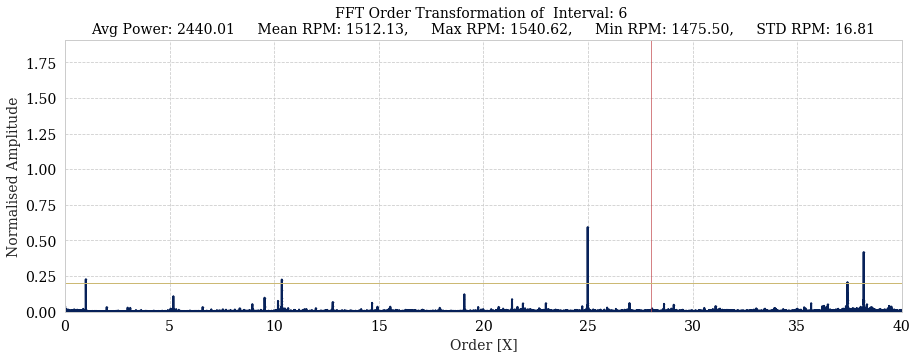

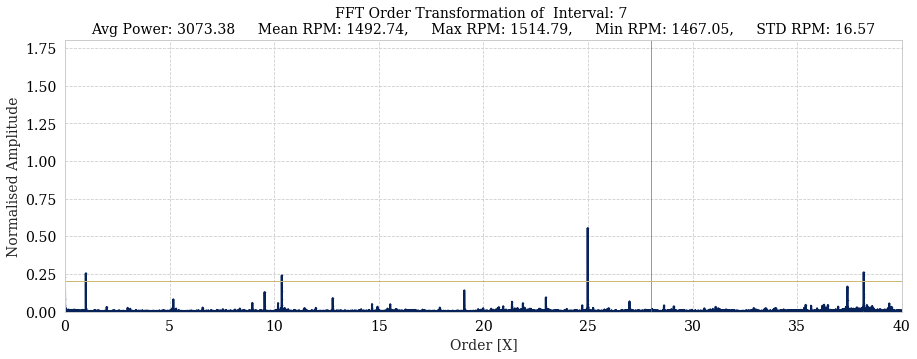

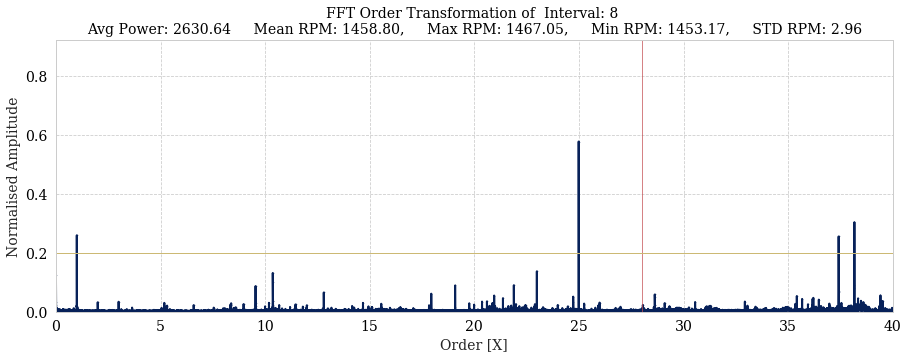

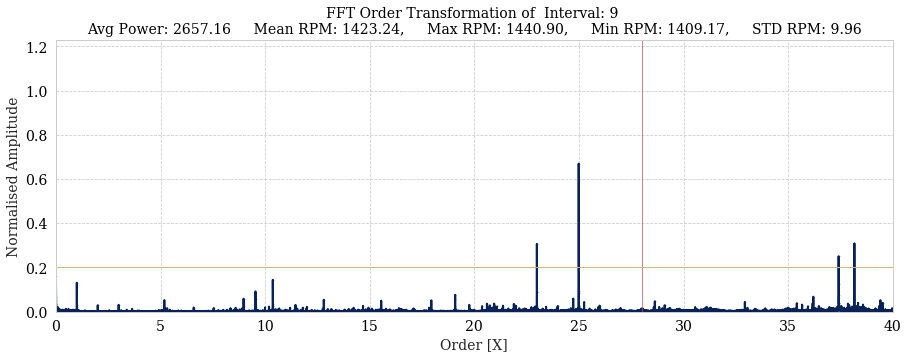

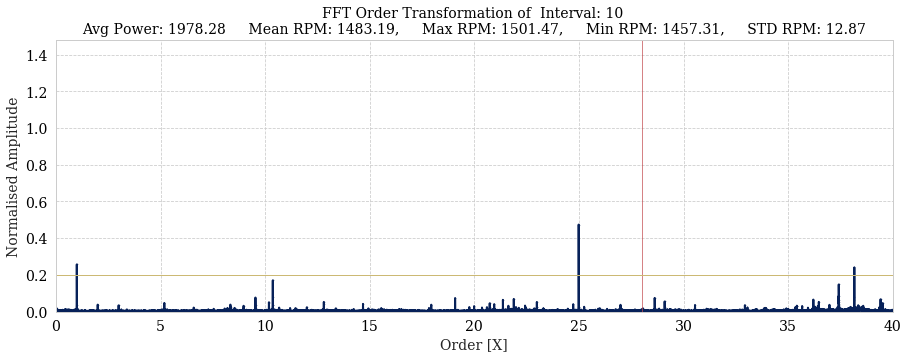

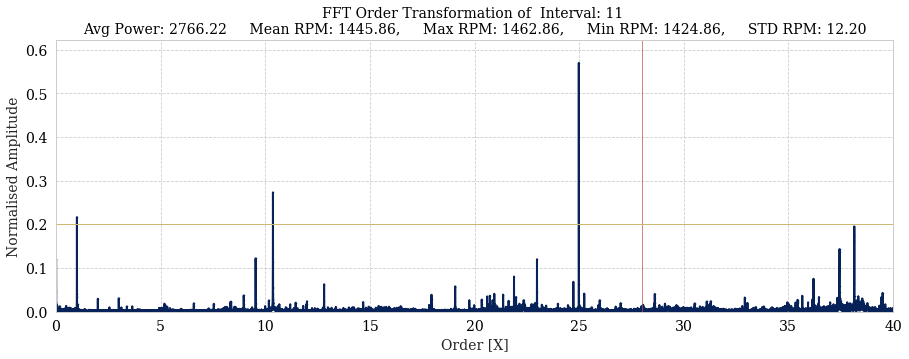

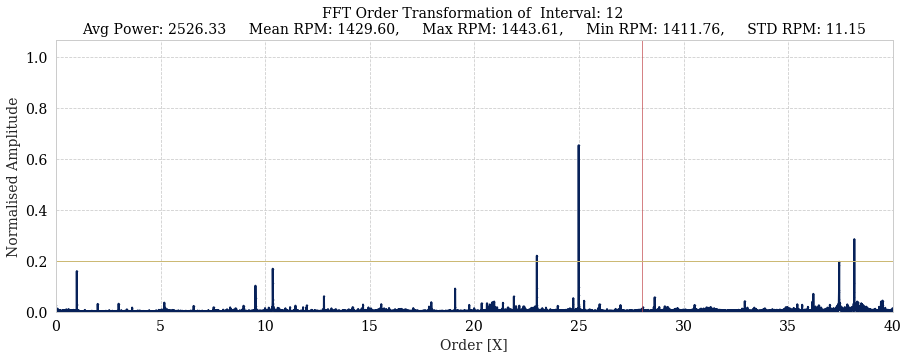

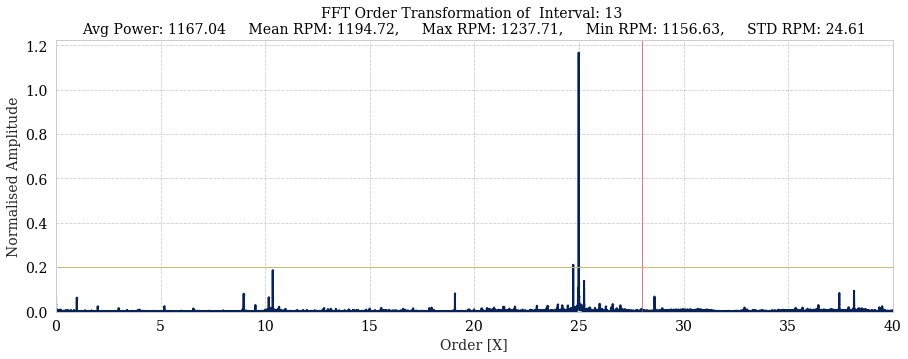

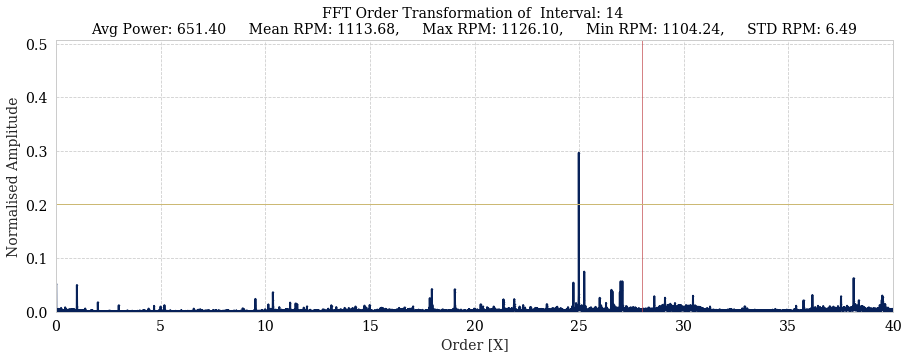

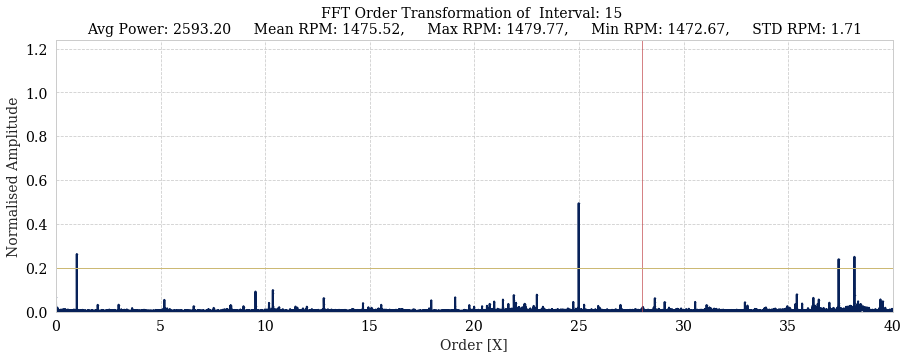

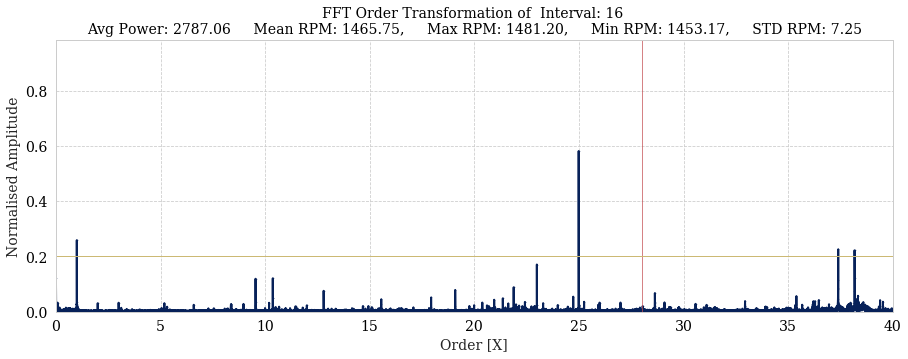

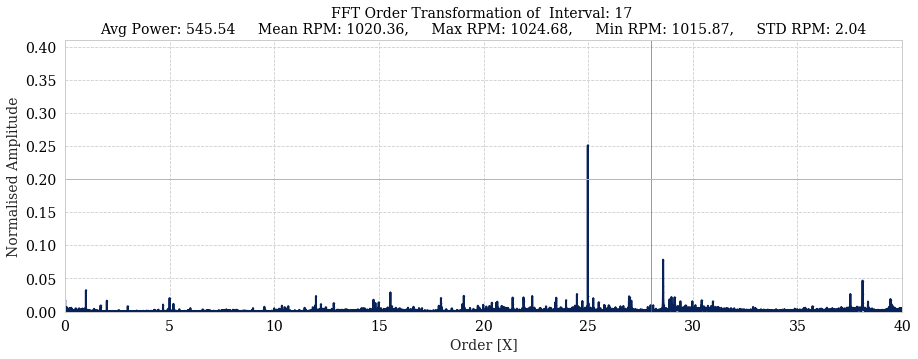

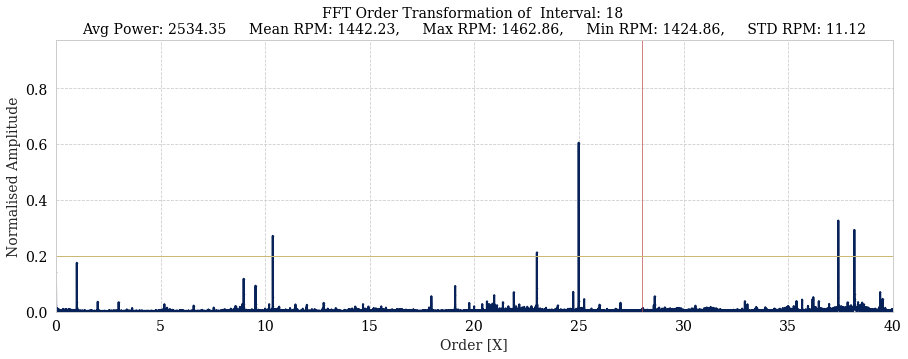

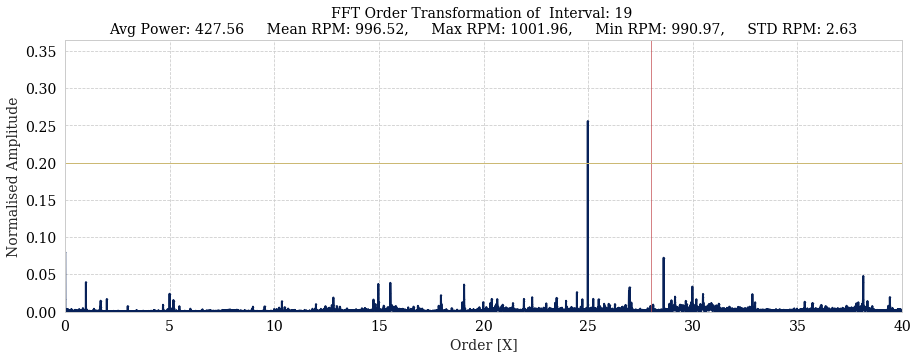

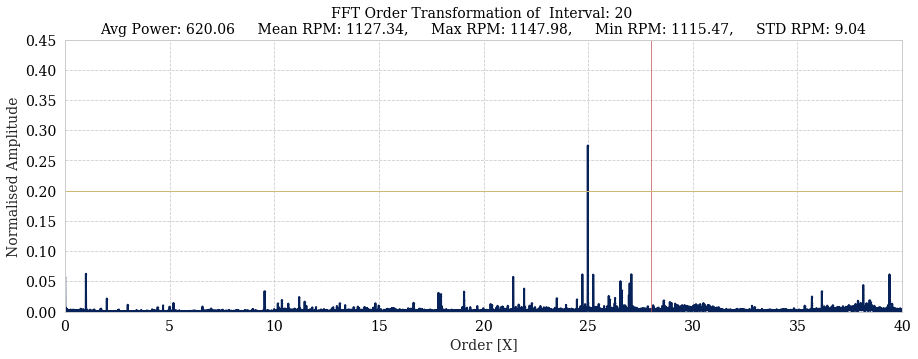

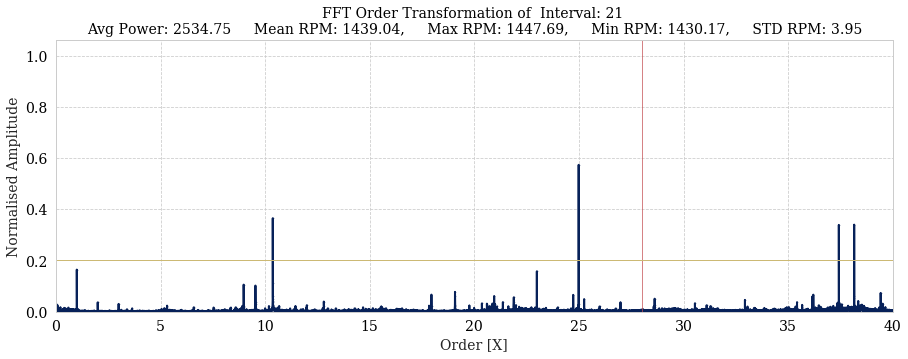

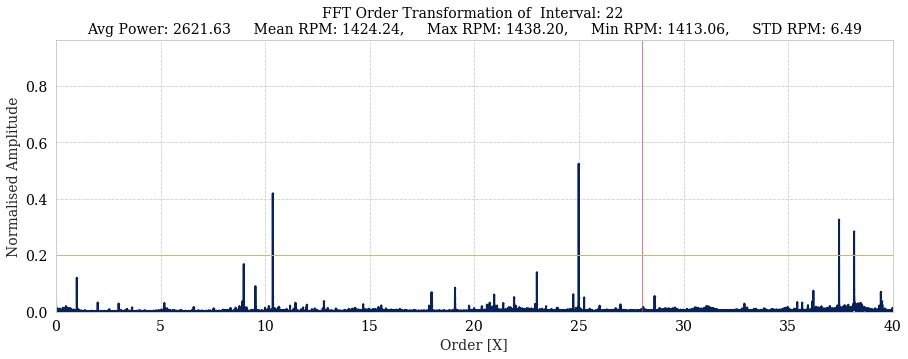

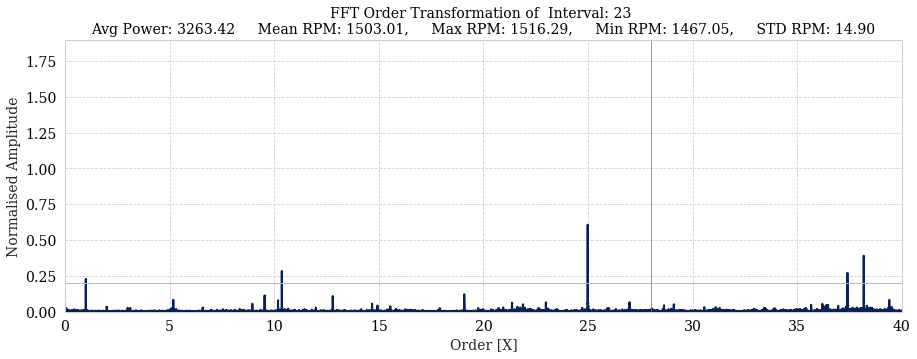

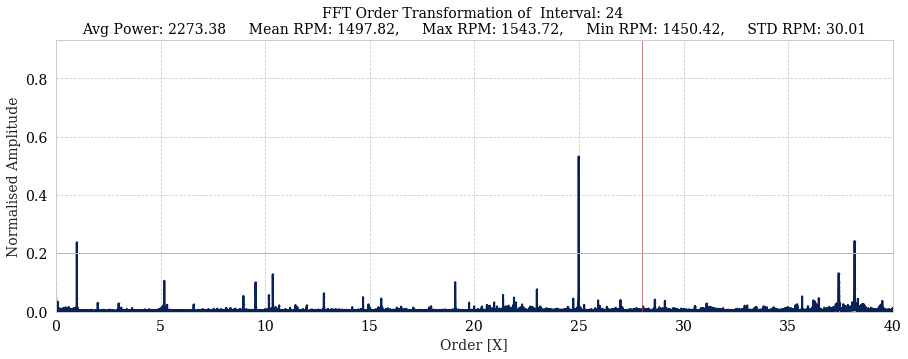

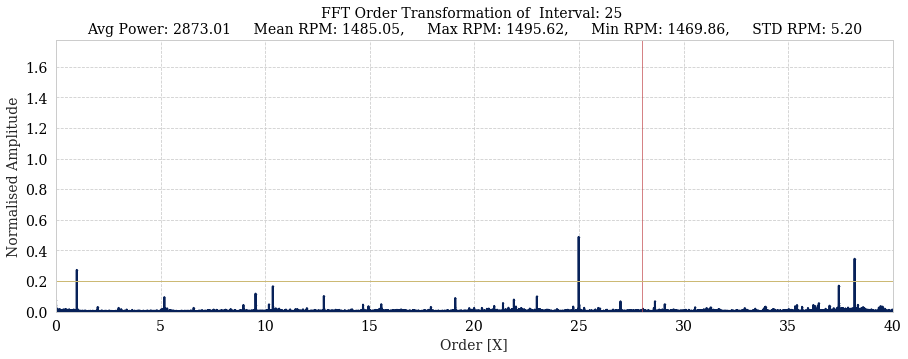

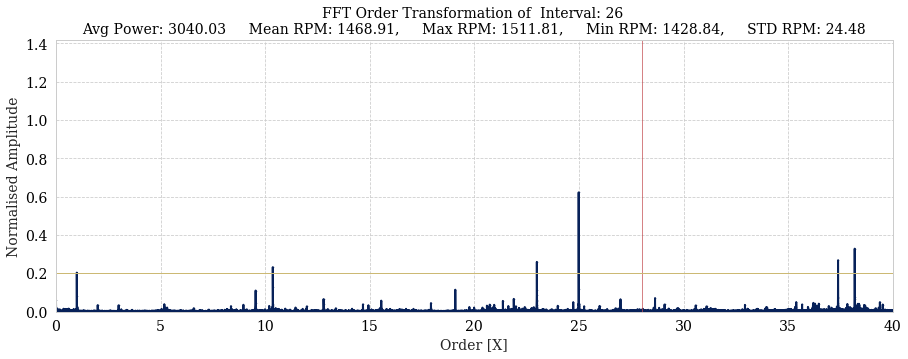

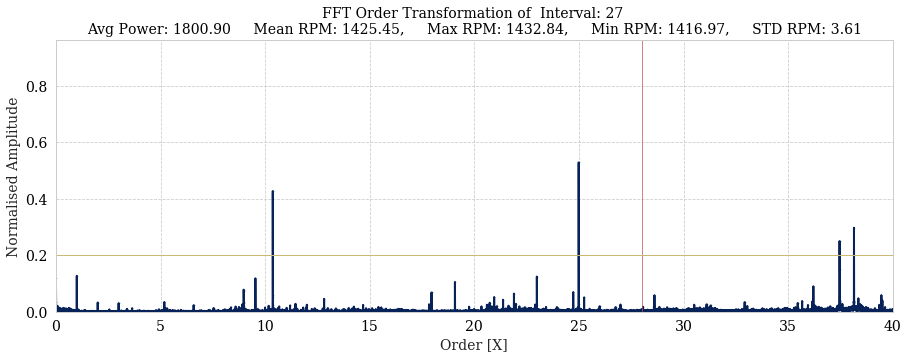

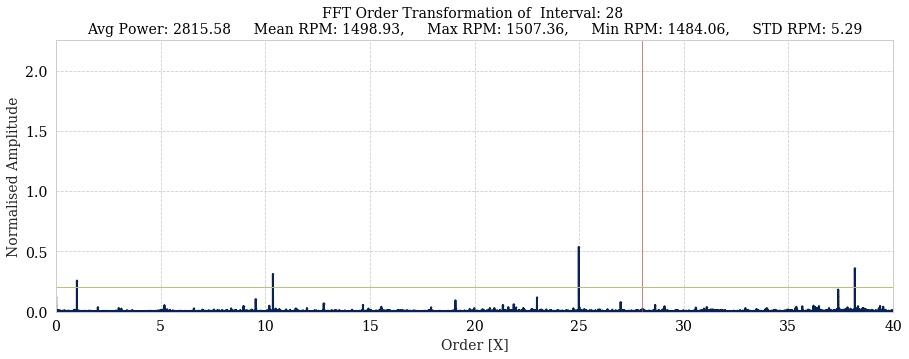

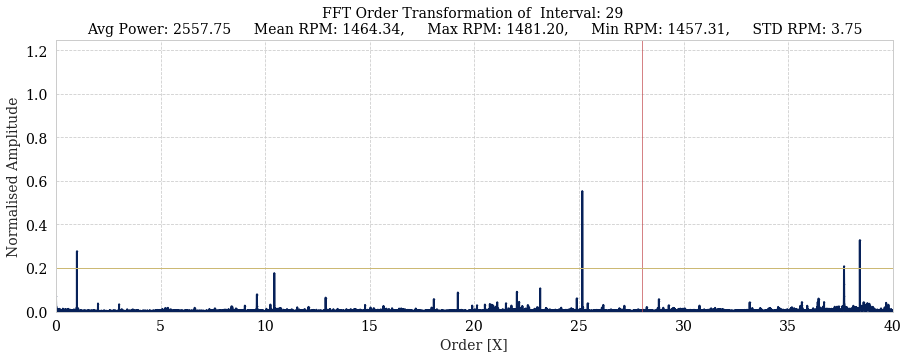

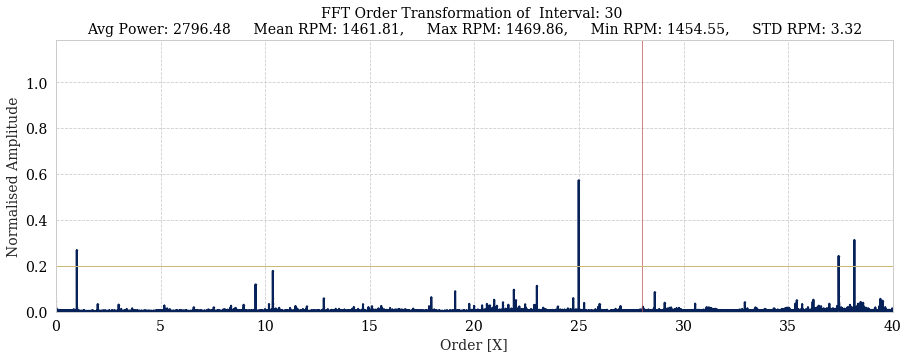

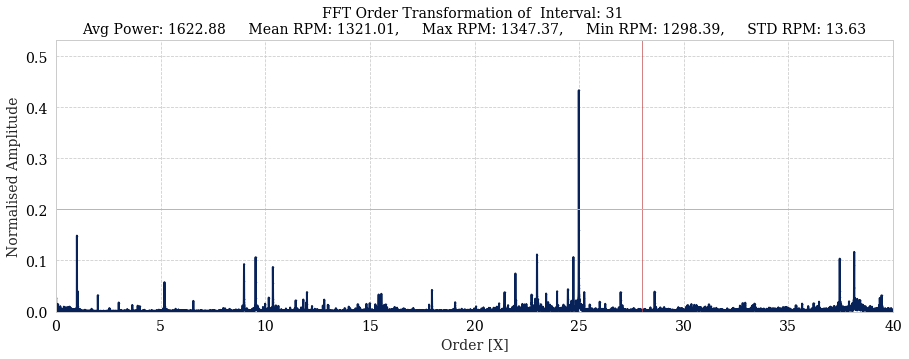

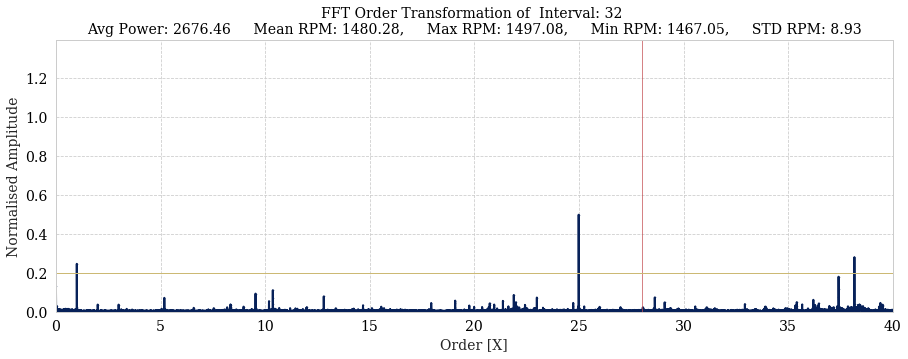

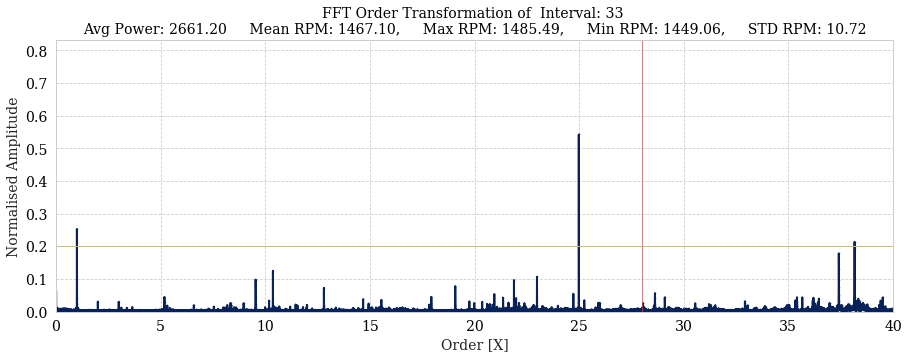

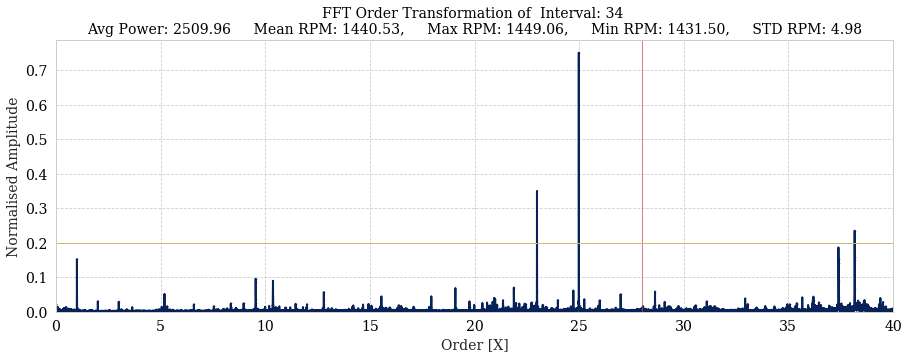

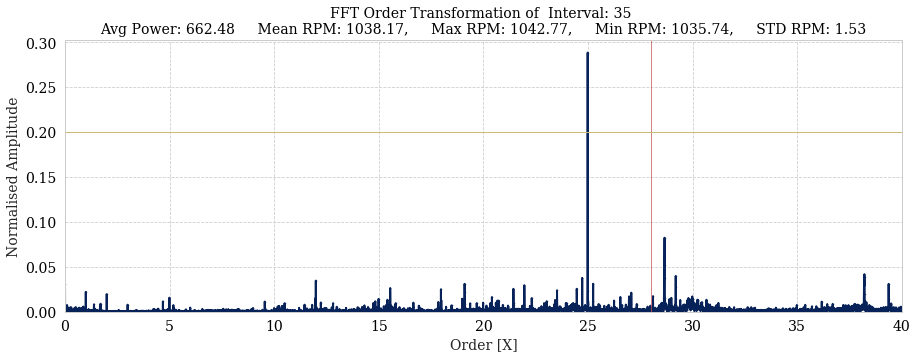

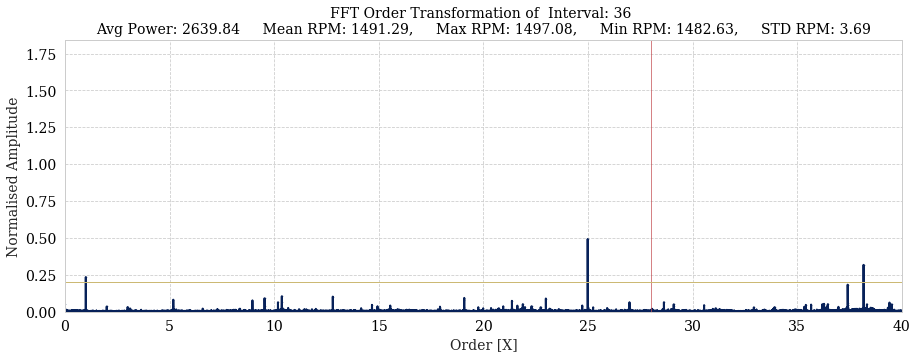

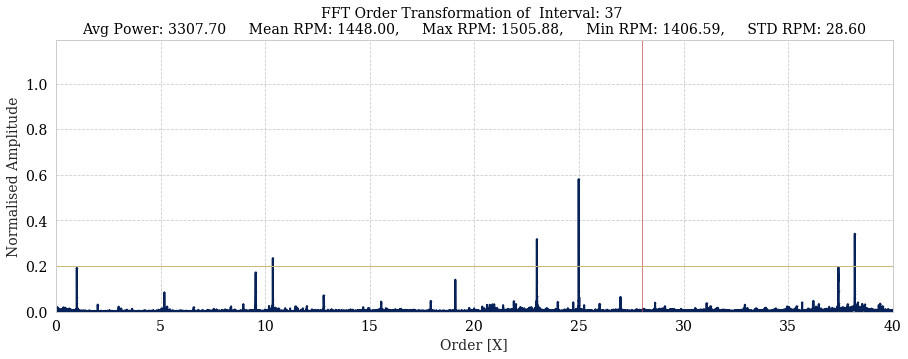

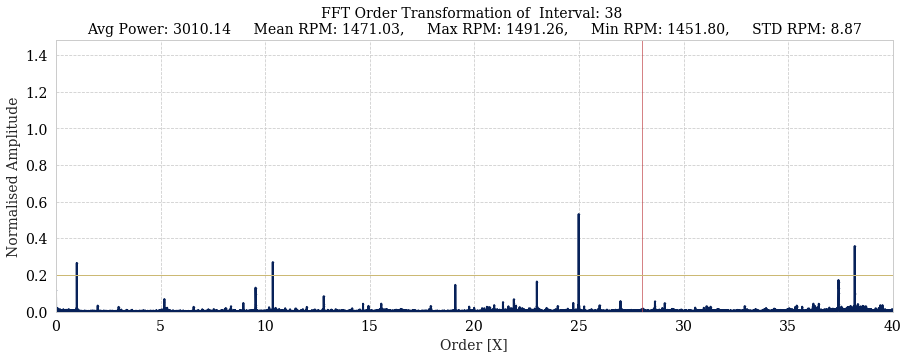

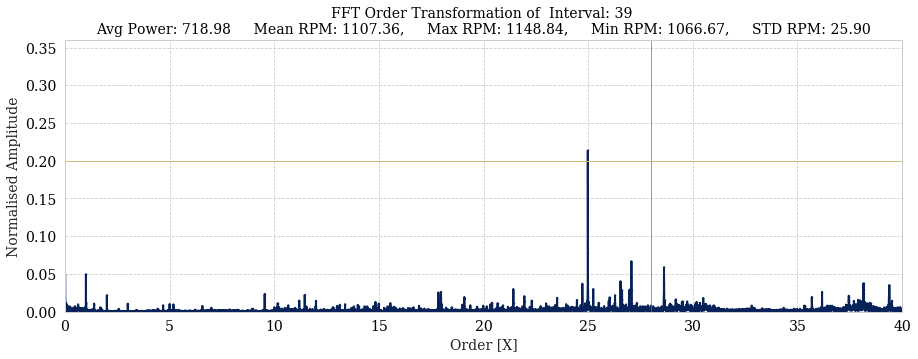

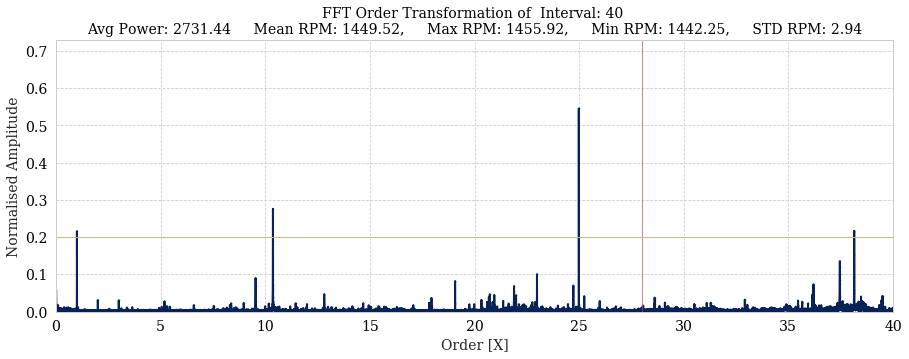

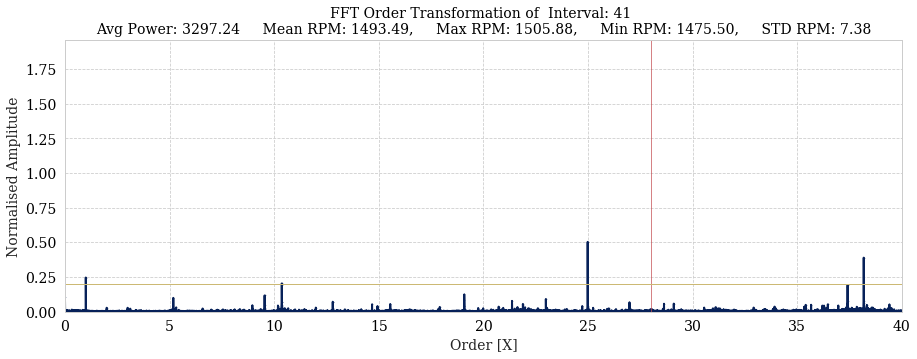

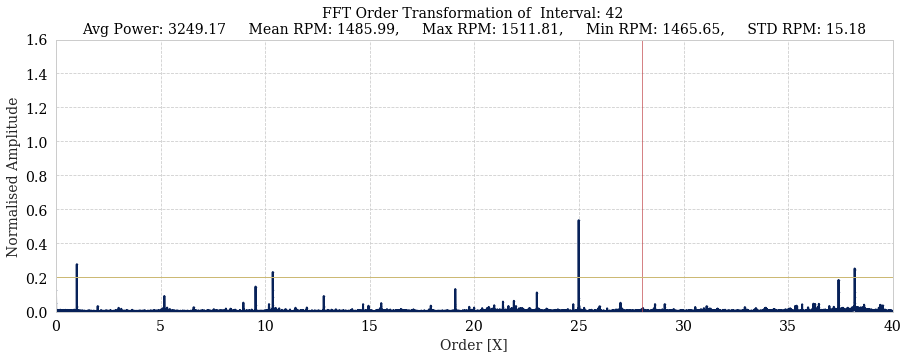

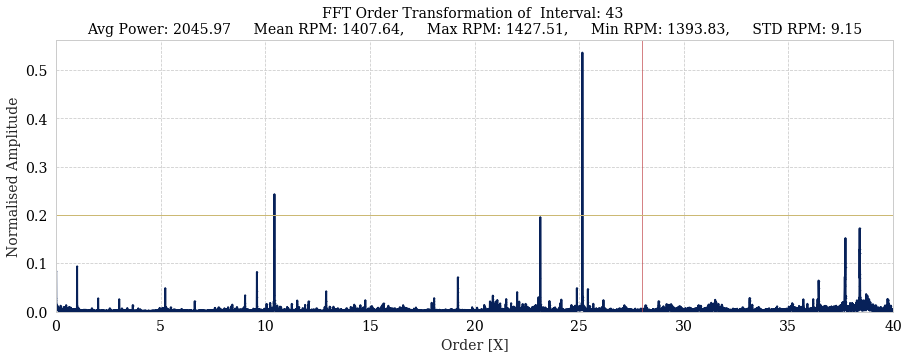

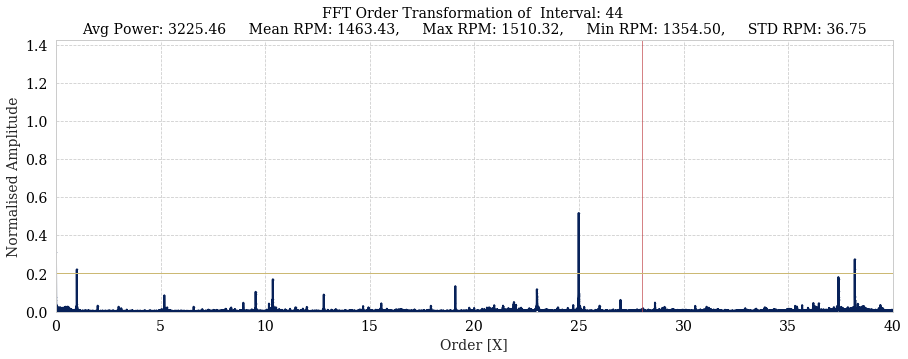

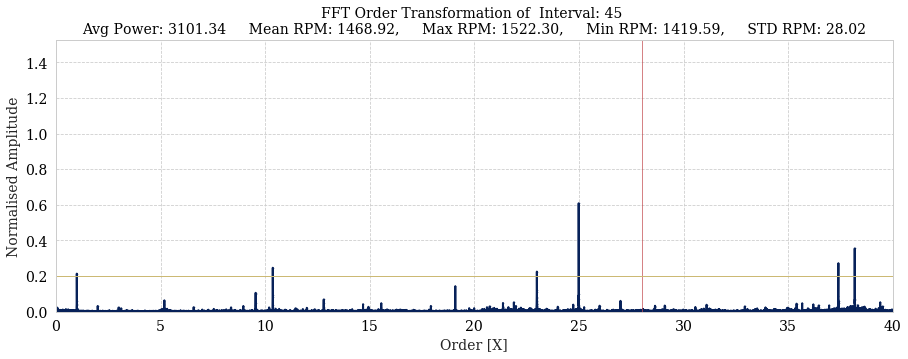

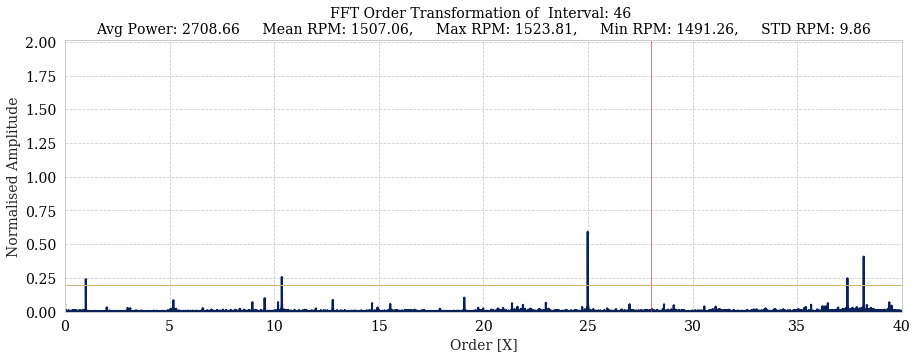

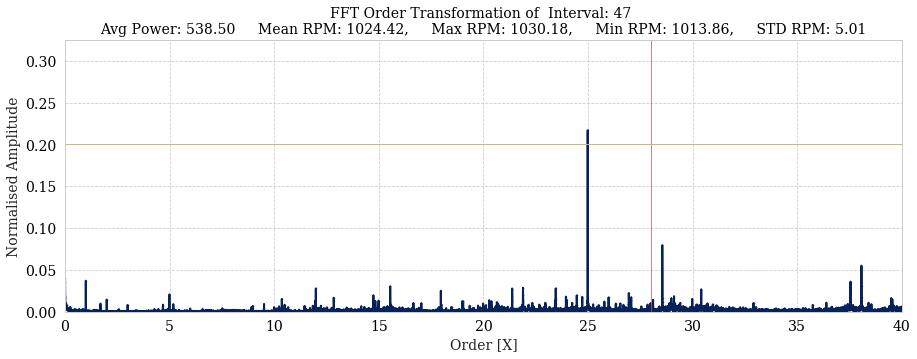

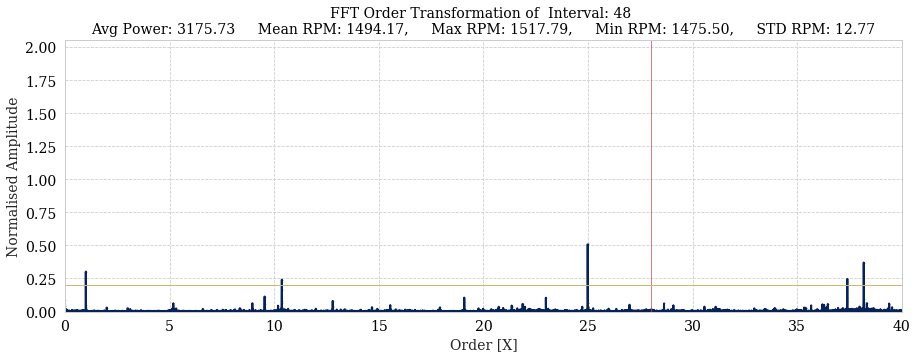

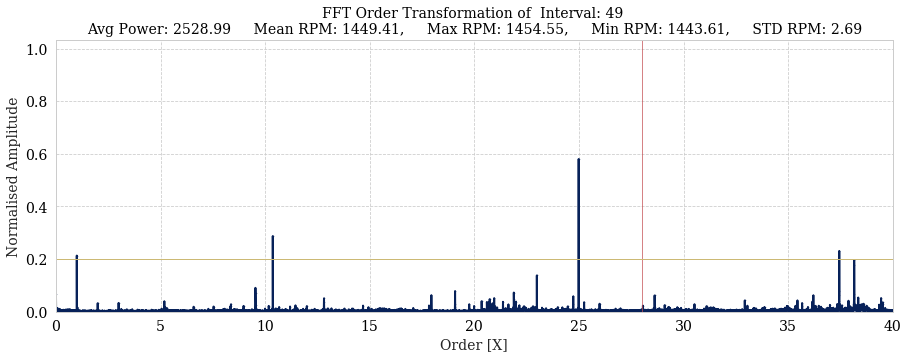

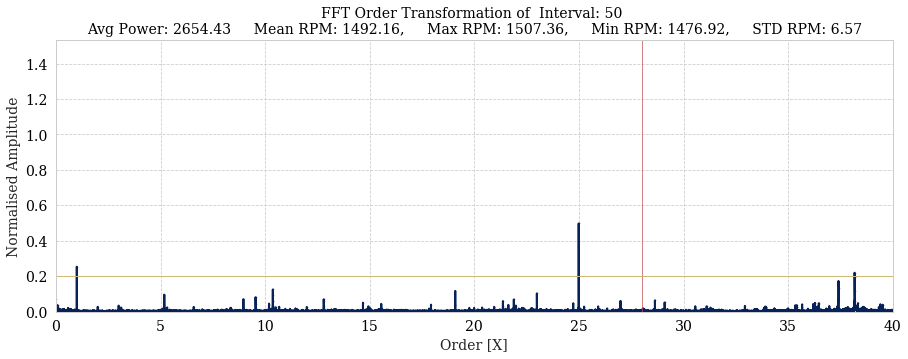

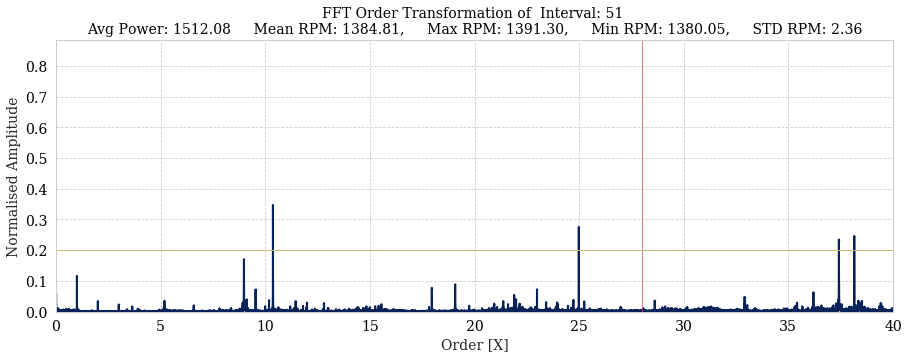

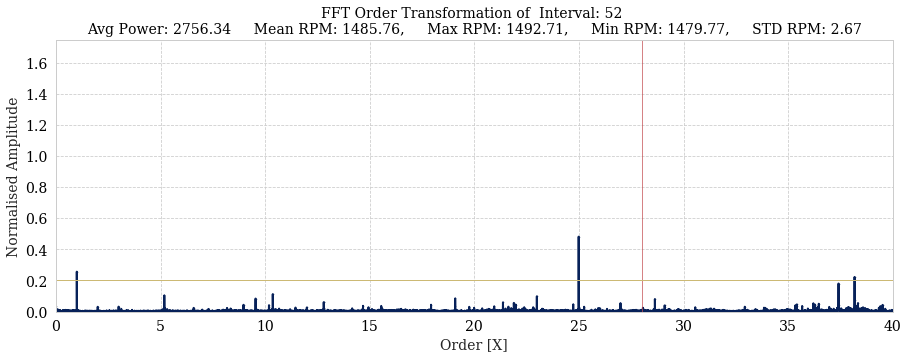

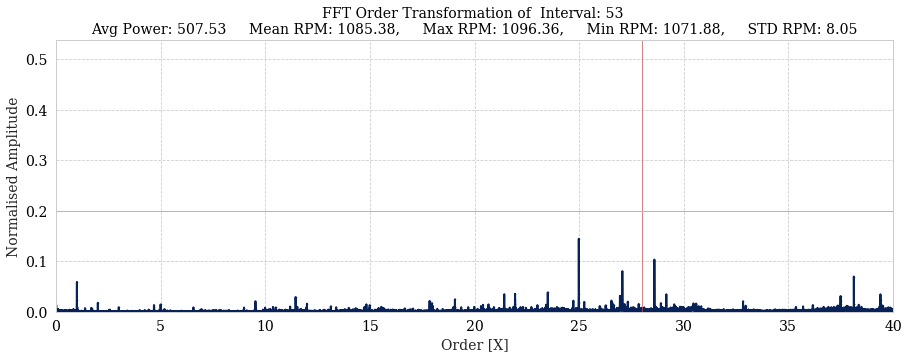

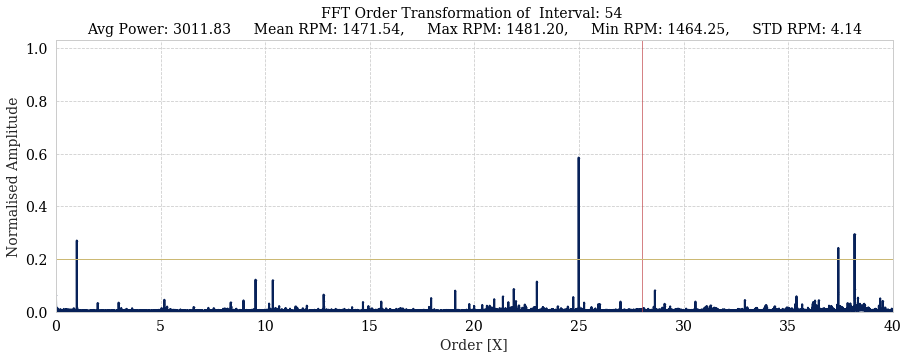

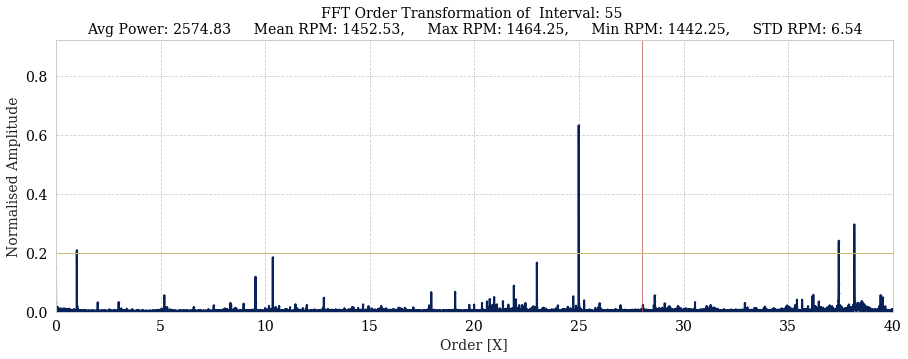

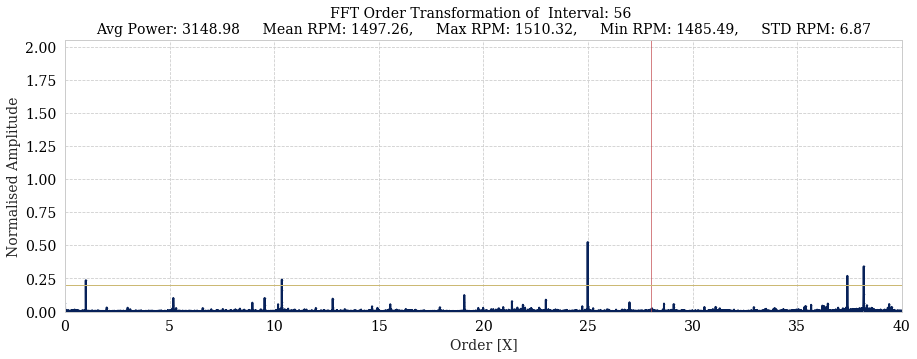

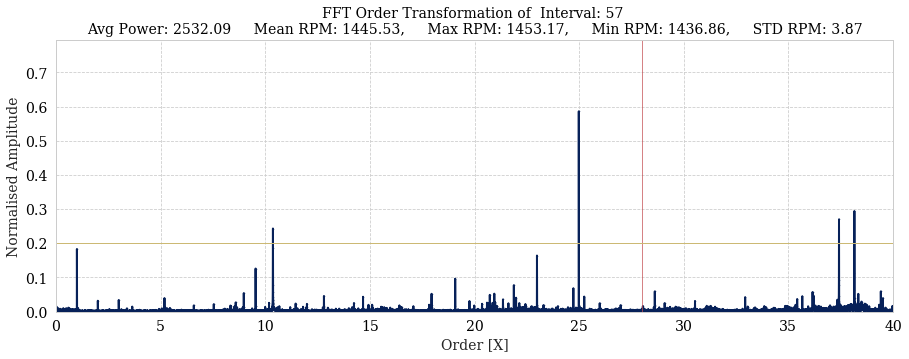

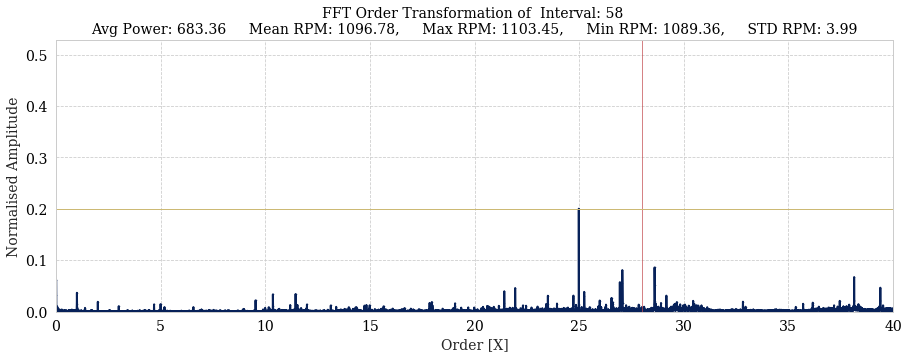

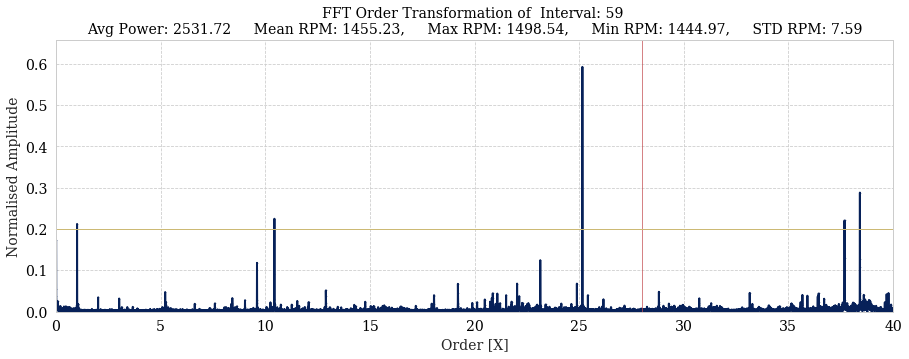

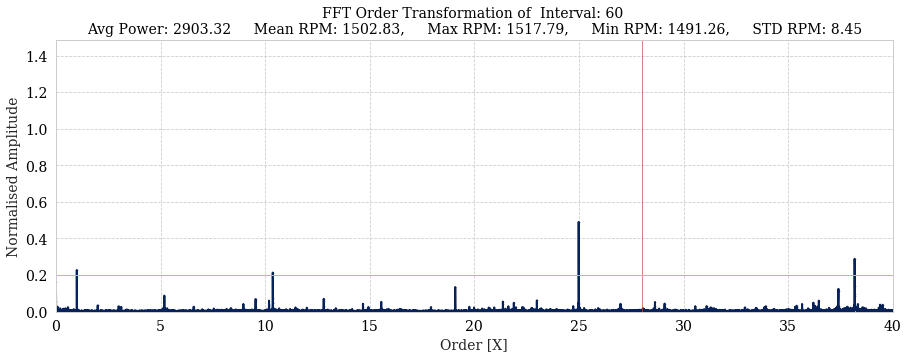

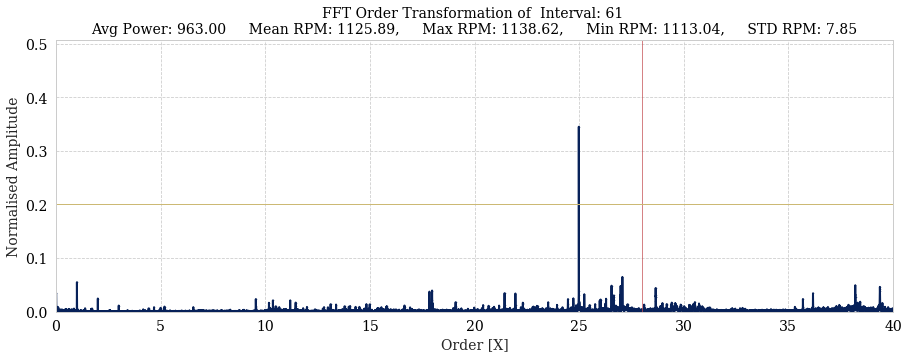

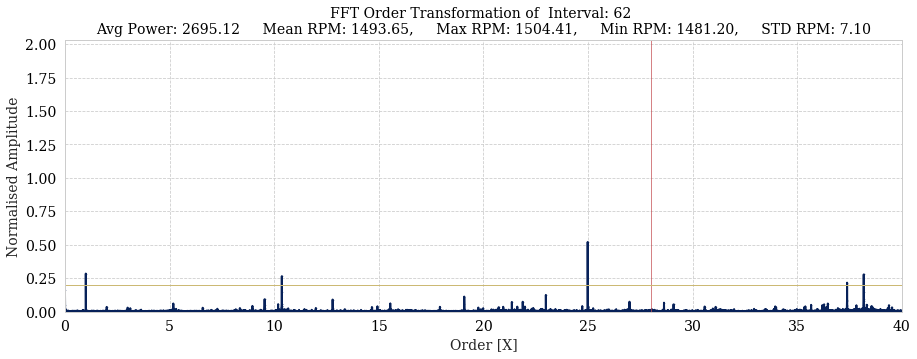

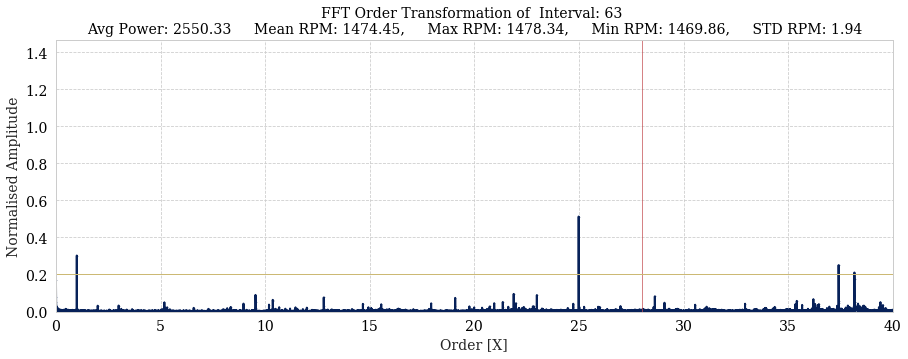

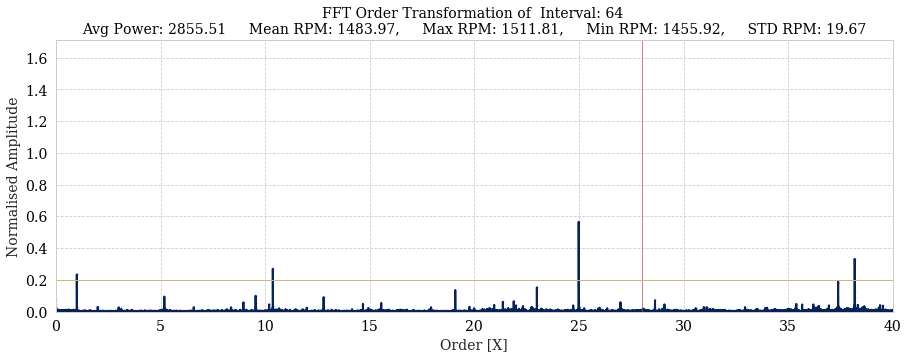

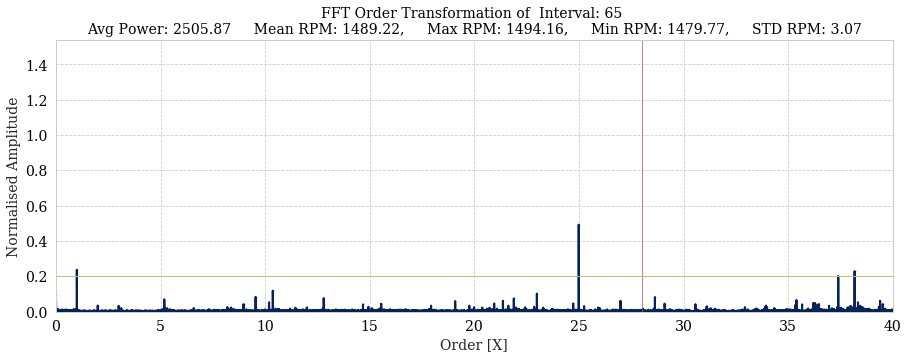

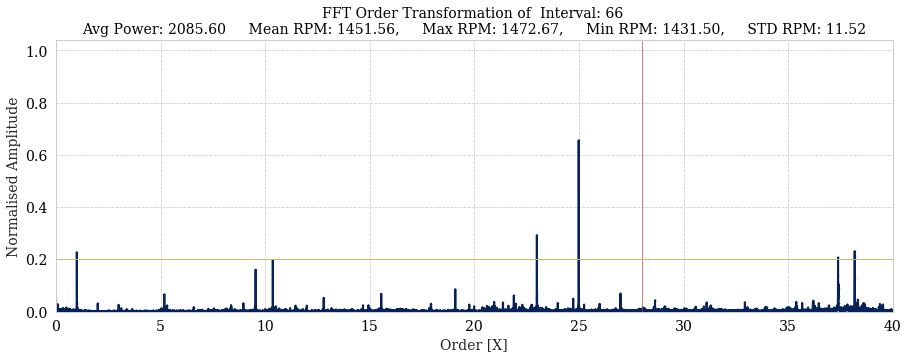

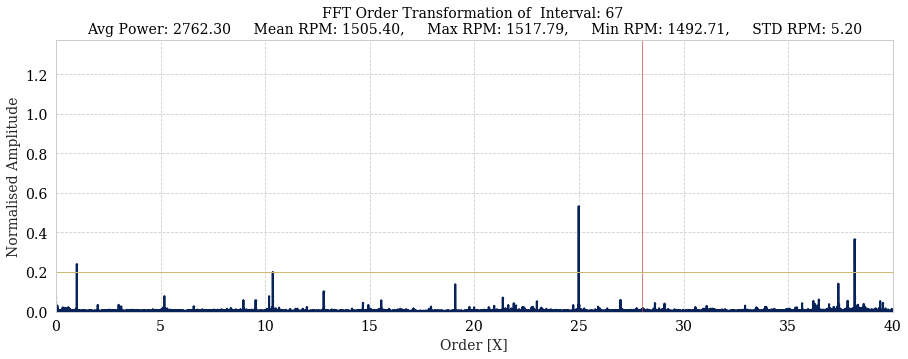

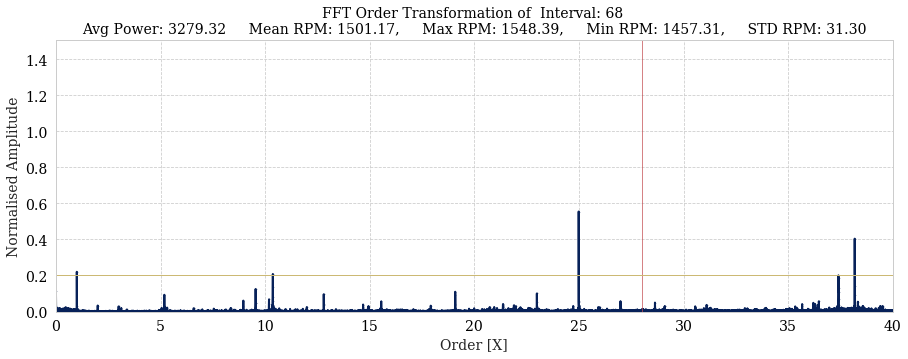

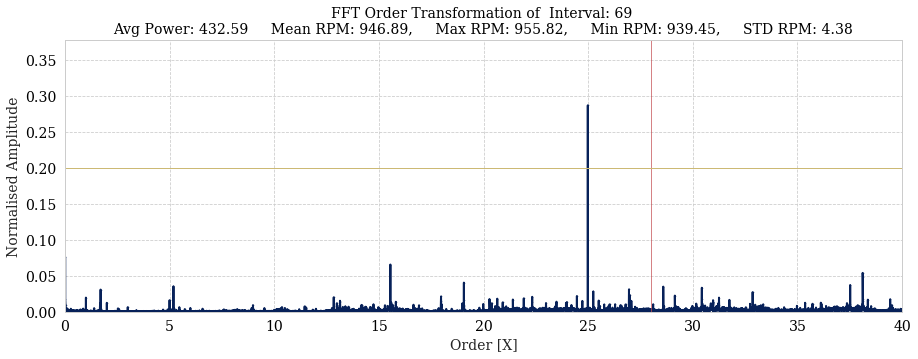

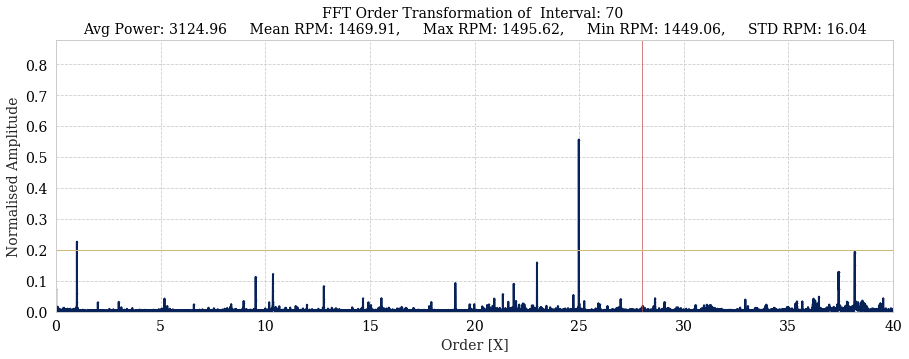

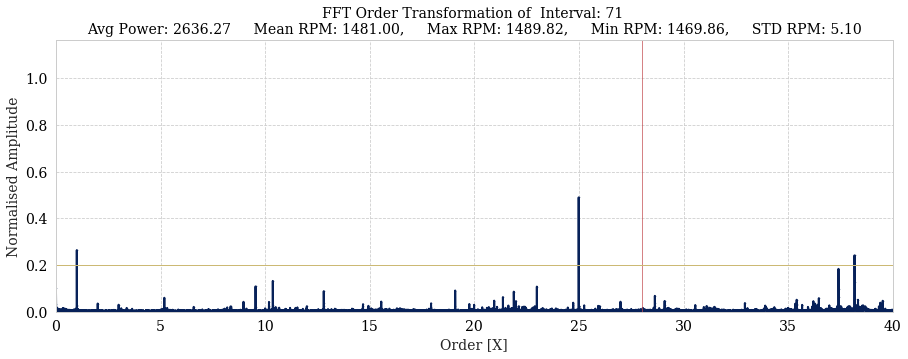

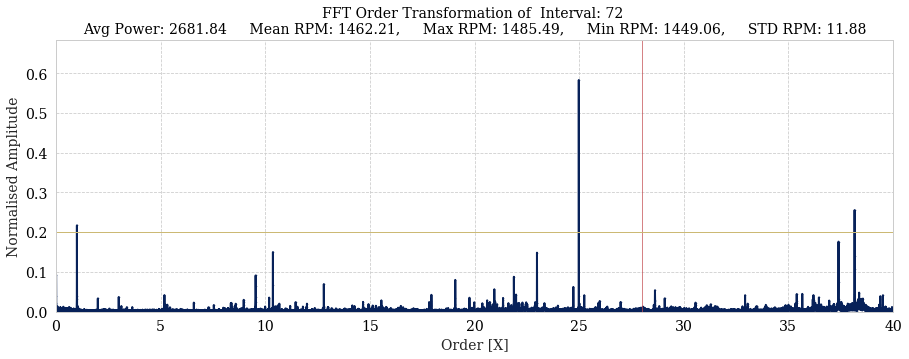

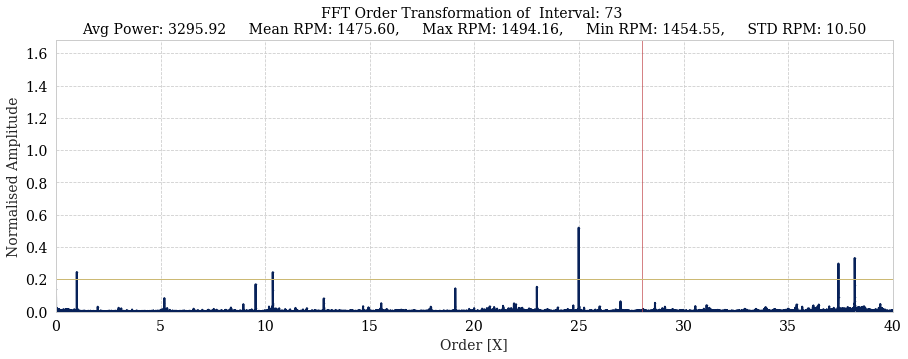

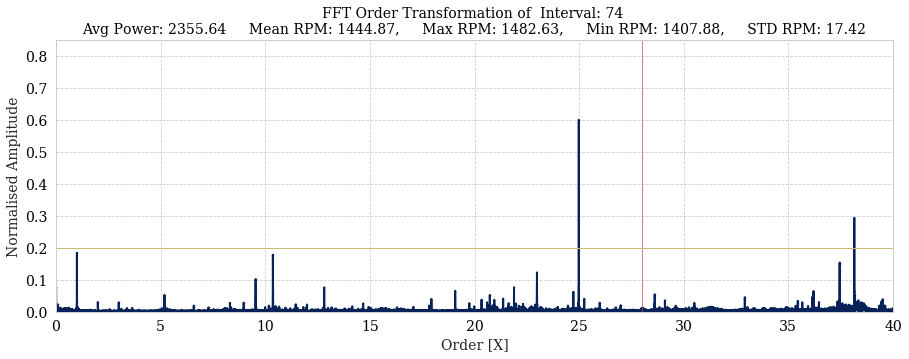

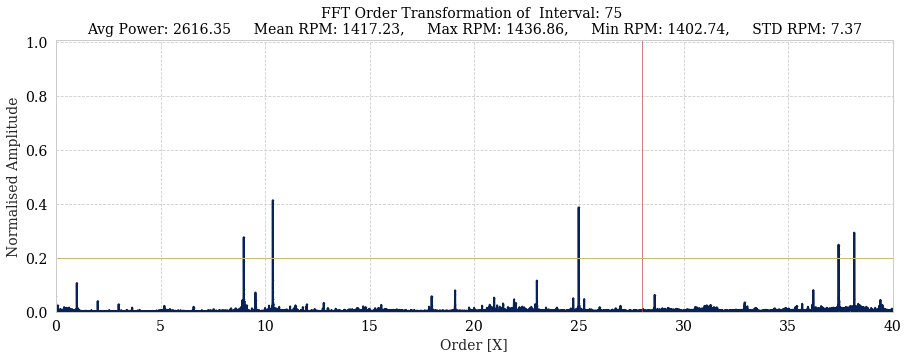

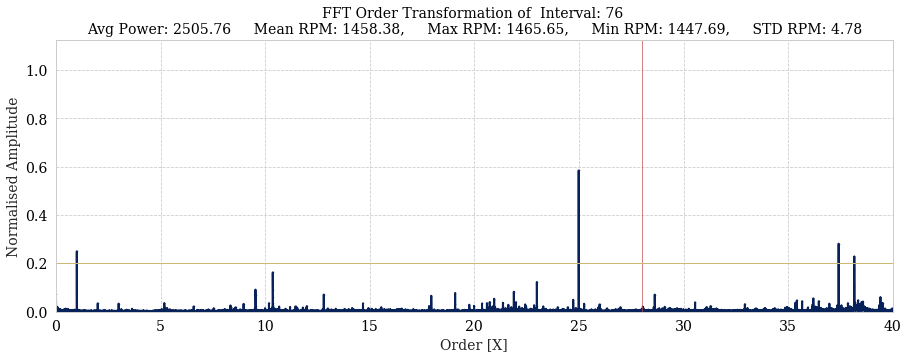

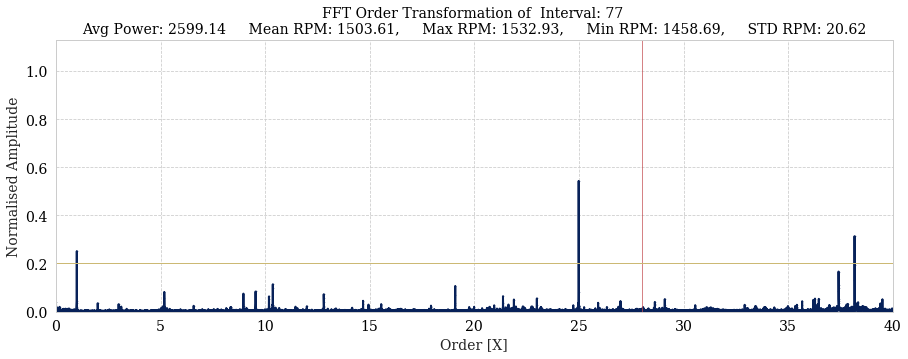

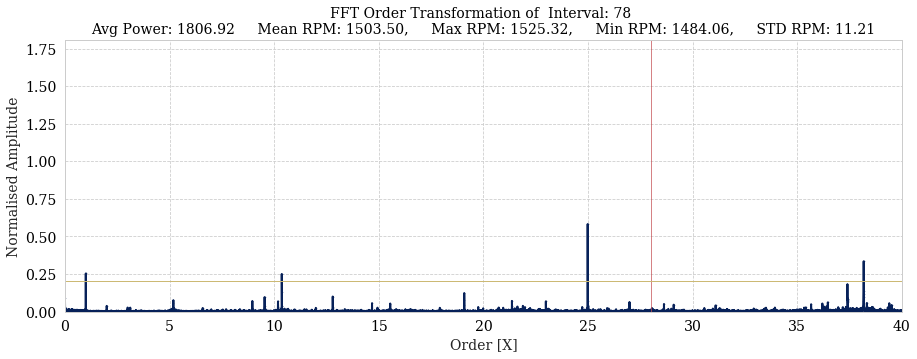

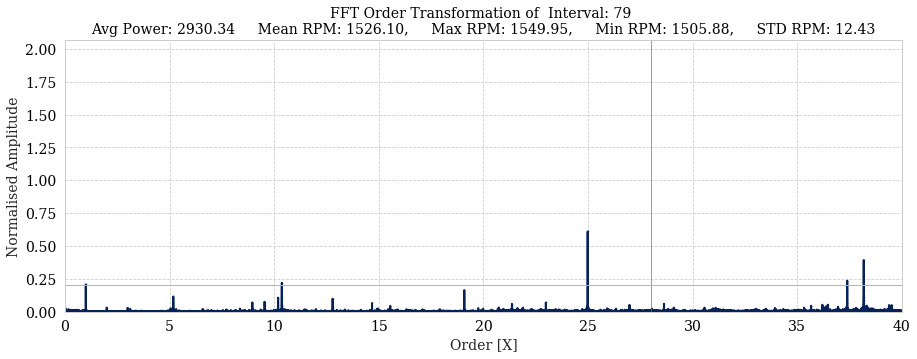

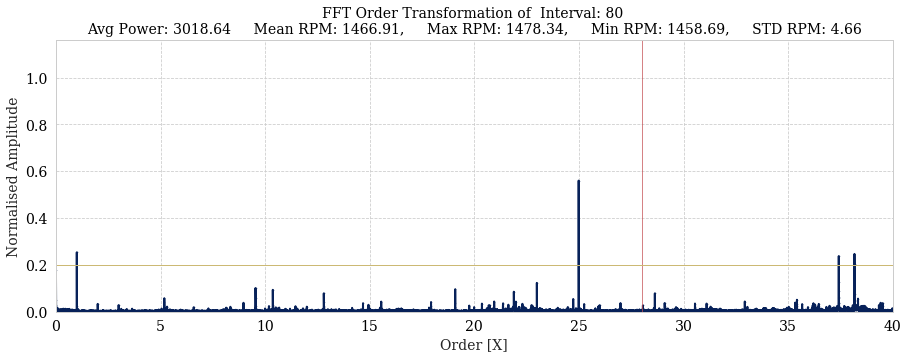

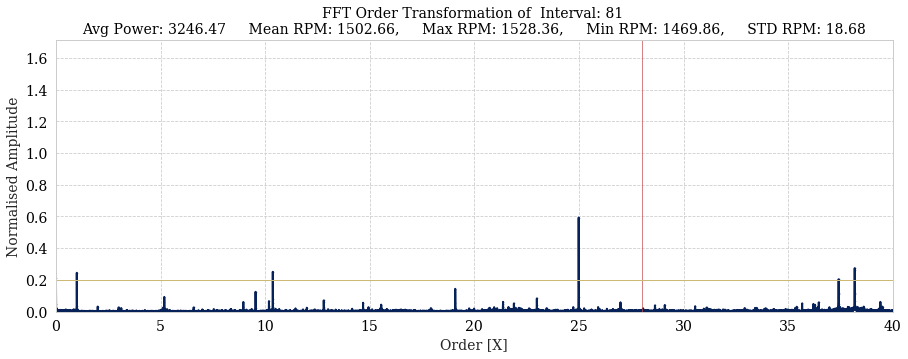

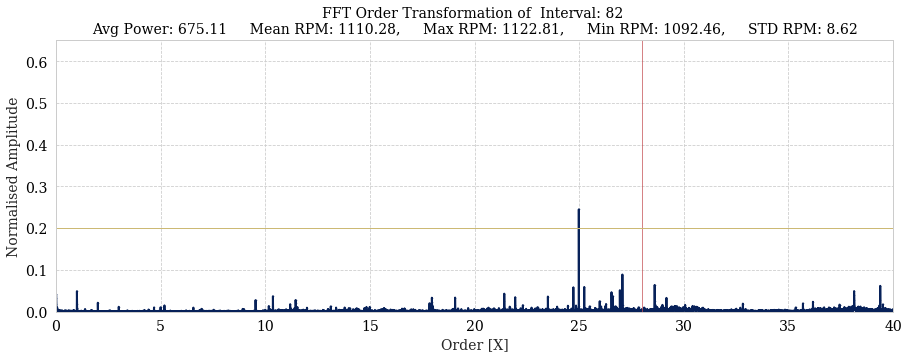

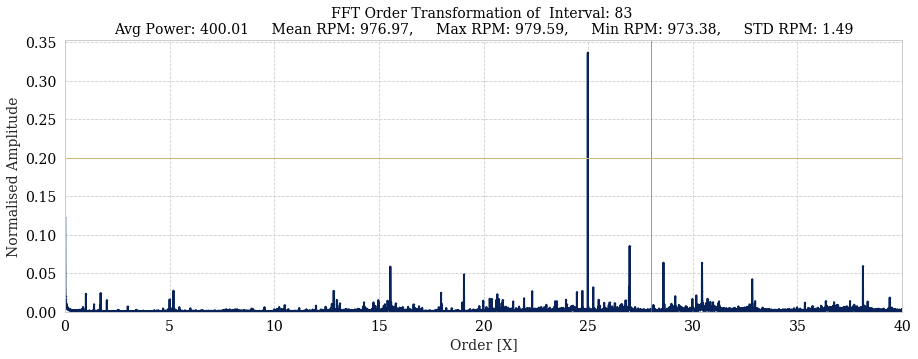

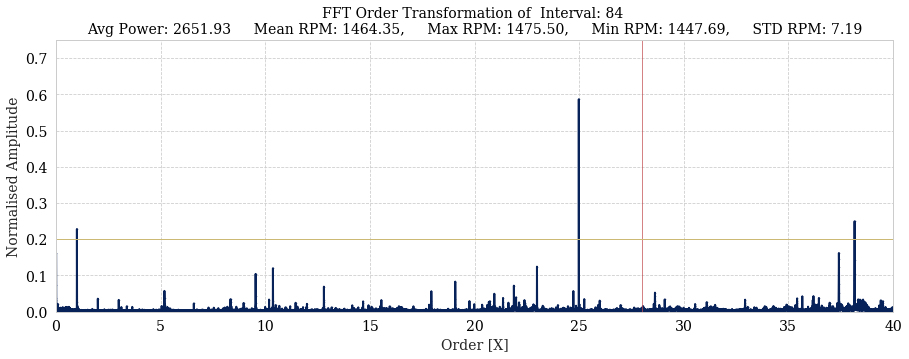

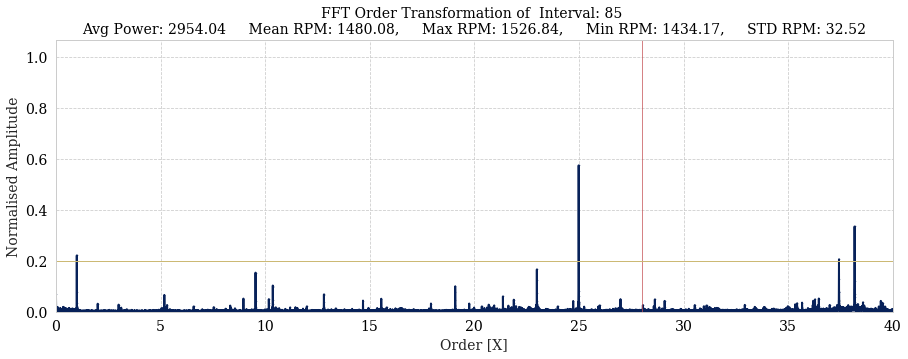

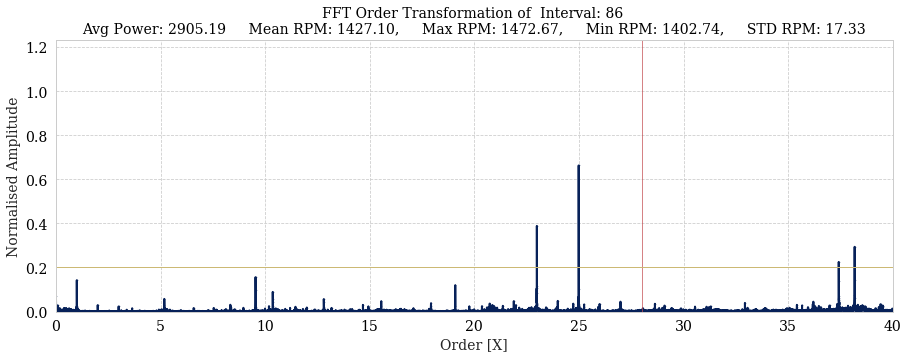

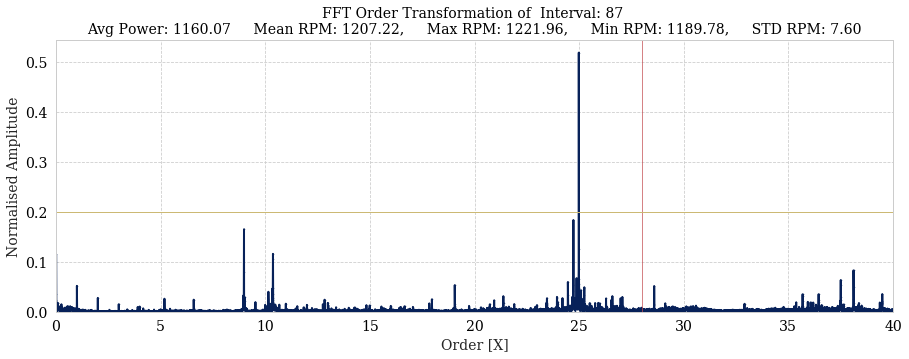

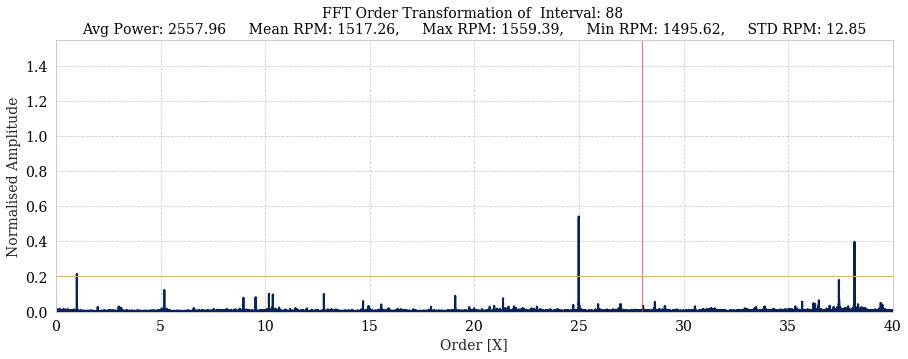

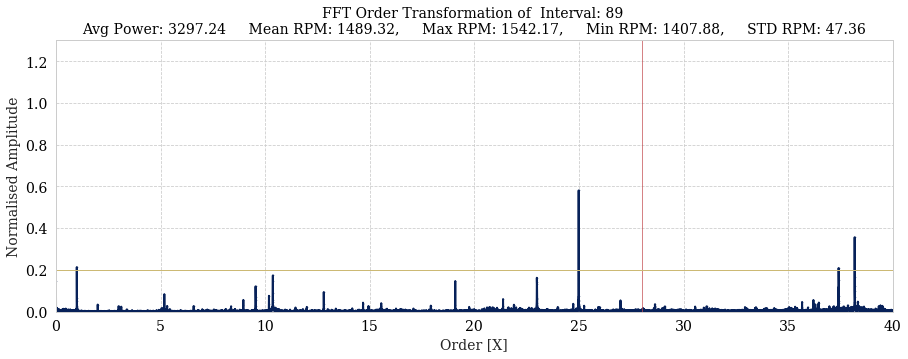

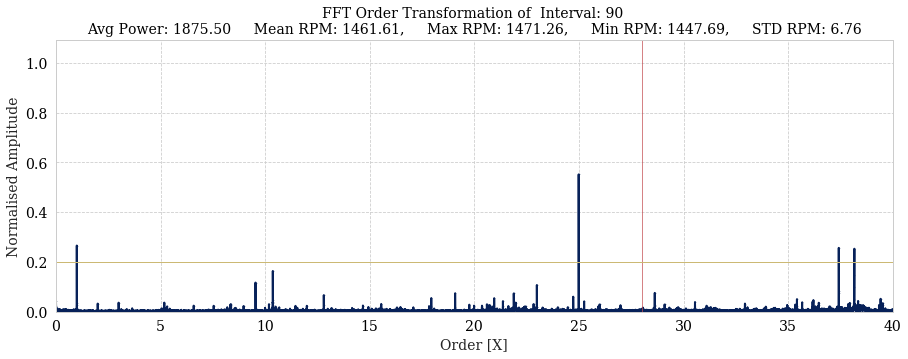

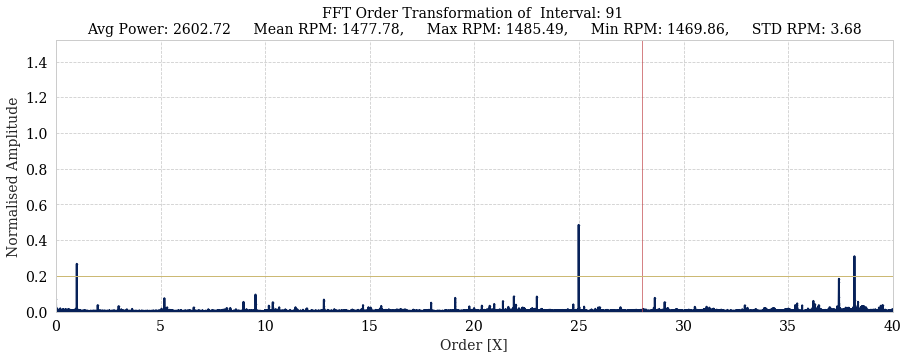

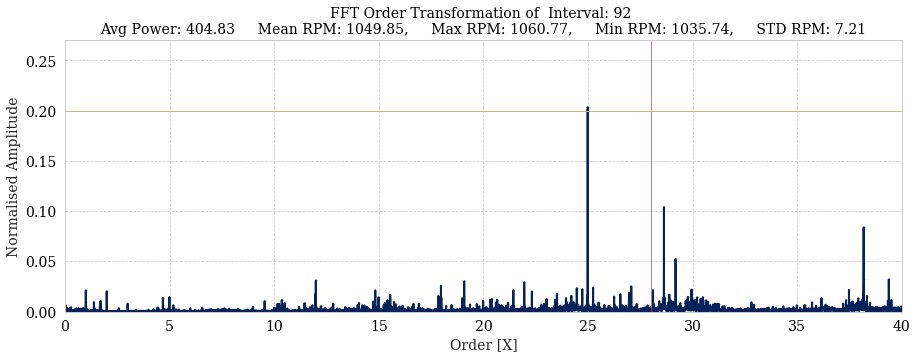

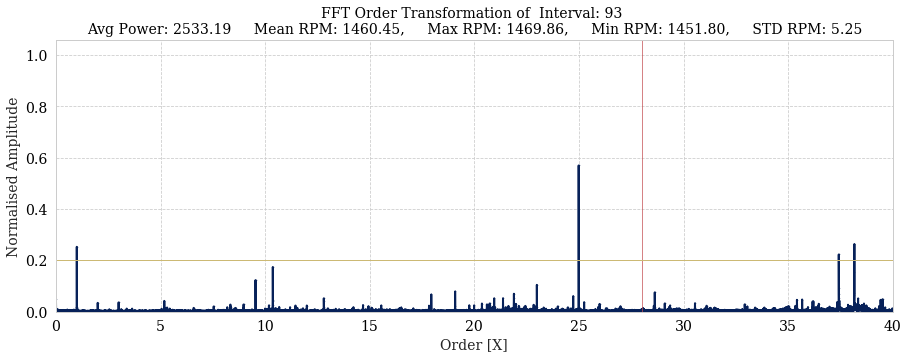

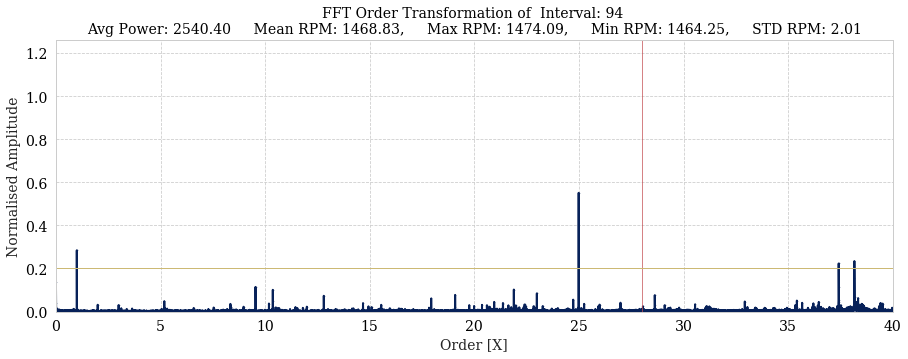

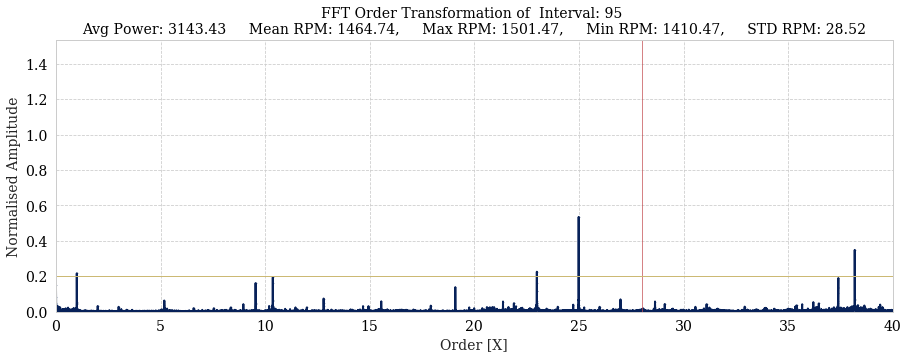

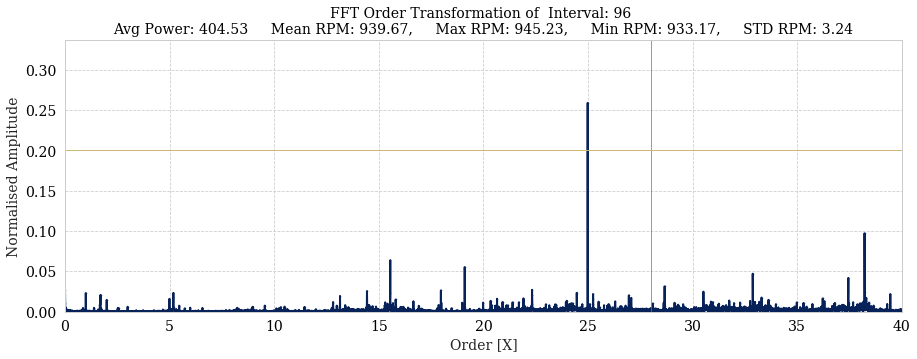

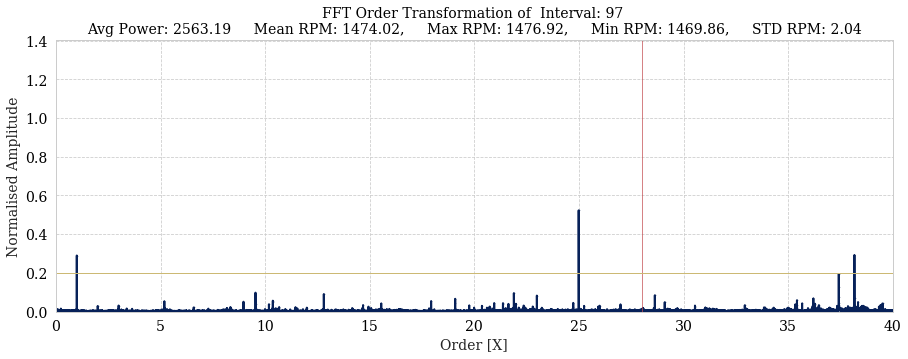

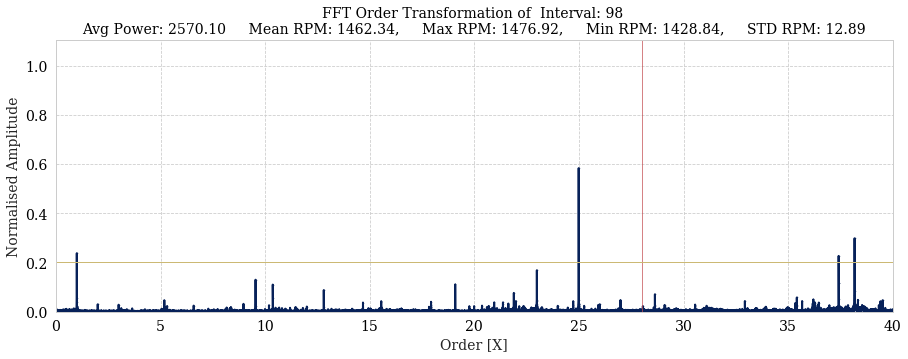

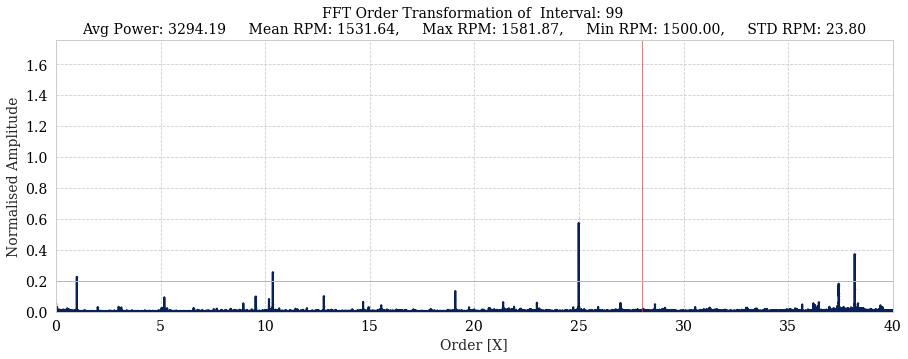

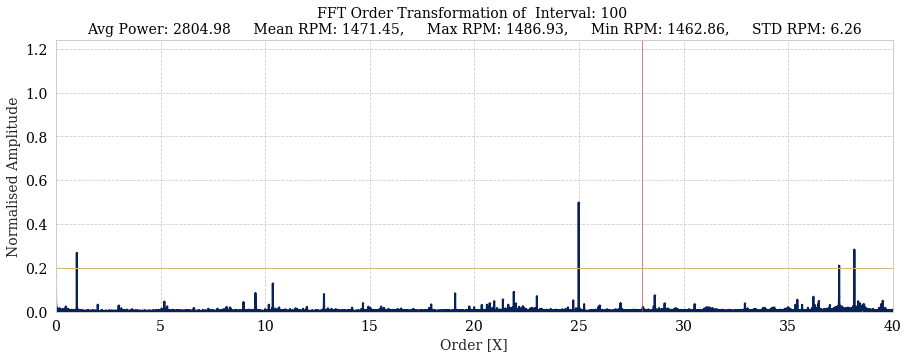

In [6]:
intervals = wt_instance.ten_second_intervals
sensor_name = 'GbxHssRr;0,0102;m/s2'
type = 'gearbox'
power_threshold = 0

for i, interval in enumerate(intervals):
    if i > 100:
        break
    
    if (interval.sensor_df.shape[1]) == 14 and (interval.op_df["PwrAvg;kW"][0] > power_threshold):
        time_stamps = interval.sensor_df['TimeStamp']
        vibration_signal = interval.sensor_df[sensor_name]
        rot_data = interval.high_speed_rot_data
        peak_array = interval.high_speed_peak_array
        avg_power = interval.op_df["PwrAvg;kW"][0]

        time_resampled, y_resampled, all_time_resampled, all_y_resampled = resample.linear_interpolation_resampling(time_stamps,
                                                                                                          vibration_signal,
                                                                                                          peak_array, 1500,
                                                                                                          round_plots=3,
                                                                                                          plotting=False,
                                                                                                          name=sensor_name)


        fast = ff_transform.FastFourierTransform(all_y_resampled, all_time_resampled, type)
        fast.fft_transform_order(rot_data, avg_power, i, plot=True, x_lim=40)